# PARAMETRIZAÇÃO

In [ ]:
# # Bloco de Configuração Inicial do Experimento
#
# Define as variáveis globais para caminhos de arquivos e parâmetros
# chave do modelo e do processo de divisão de dados. Manter estas
# configurações centralizadas facilita a experimentação com diferentes
# valores e a manutenção do código.

# ================================================
# Definição dos caminhos dos arquivos principais
# ================================================
# Variáveis que armazenam os nomes dos arquivos CSV.
# 'full_path' é o dataset completo original.
# 'train_path' e 'test_path' são os nomes dos arquivos que serão gerados
# pela função de separação inicial.
full_path = "pld-full.csv"
train_path = "pld-train.csv"
test_path = "pld-test.csv"
result_path = "pld-result.csv"
# --- ADIÇÃO ---
# Caminho para salvar o objeto do modelo final treinado, para reuso futuro.
model_path = "sonora_final_model.joblib"

# ================================================
# Parâmetros de Reproducibilidade --- (NOVA SEÇÃO ADICIONADA)
# ================================================
# Semente aleatória (seed) para garantir que as divisões de dados e os modelos
# que possuem componentes estocásticos produzam sempre os mesmos resultados.
# Essencial para a reprodutibilidade dos experimentos.
random_state = 42

# ================================================
# Parâmetros de configuração para divisão de dados e classificação
# ================================================
# 'test_size_train': Define a proporção do dataset original (lido de 'full_path')
# que será separada para criar o conjunto de teste final (test_path). O restante
# formará o conjunto de treino (train_path).
test_size_train = 0.2

# 'test_size_classification': Controla a proporção do conjunto de treino
# (após ser carregado de 'train_path' e passar pelo tratamento inicial)
# que será usada como um conjunto de validação/teste interno.
# Este conjunto é usado, por exemplo, para gerar a Curva ROC e para as
# explicações com SHAP.
test_size_classification = 0.2

# 'limiar_max_recall': Limiar de probabilidade para a decisão final
# da classe 'COMUNICAR'. Este valor é usado após o modelo
# calcular as probabilidades, permitindo ajustar o trade-off
# entre Precision e Recall para a classe de interesse.
limiar_max_recall = 0.15

# 'positive_class_label': Rótulo exato da classe positiva no dataset.
# É usado para garantir consistência no cálculo de métricas e
# na lógica de decisão focada na classe positiva.
positive_class_label = 'COMUNICAR'

criar_coolunas_proporcao_valor_renda = True
criar_coluna_gap_log_valor_renda = True

# ================================================
# Definição das Colunas (Features e Target) --- (NOVA SEÇÃO ADICIONADA)
# ================================================
# Centraliza os nomes exatos das colunas do dataset para evitar erros de digitação
# e facilitar a manutenção do código. Foram validados com o arquivo pld-full.csv.

# Nome da coluna alvo (variável dependente).
target_column = 'PARECER'

# Lista das features numéricas a serem usadas no modelo.
features_num = [
    'VALOR RENDA',
    'VALOR RENDA FATURAMENTO',
    'VALOR ENVOLVIDO',
    'VALOR SCORE KYCREP',
    'VALOR SCORE OPERACIONAL',
    'VALOR SCORE PARTICIPANTE',
    'VALOR SCORE PRODUTO',
    'VALOR SCORE SOCIO',
    'DATA RELACIONAMENTO'
]

# Lista das features categóricas a serem usadas no modelo.
features_cat = [
    'PRODUTOS ALERTADOS',
    'FLAG LISTA VIGILANCIA',
    'FLAG PEP',
    'FLAG PARTICIPANTE',
    'FLAG PROCESSO EXTERNO ABERTO',
    'FLAG DOSSIÊ',
    'UF'
]

# Lista de colunas que devem ser removidas do dataset antes do treinamento.
# Geralmente são campos de texto livre ou identificadores.
columns_to_drop = [
    'DESCRIÇÃO REVISÃO ANALISE'
]


# =======================================================================
# Dicionário Unificado para Tradução de Features (Português -> Inglês)
# Contém nomes originais e nomes gerados pelo pré-processador (pipeline).
# =======================================================================
colunas_traduzidas = {
    # --- Nomes Originais (para Matriz de Correlação, etc.) ---
    'VALOR RENDA FATURAMENTO': 'Income Reported',
    'VALOR ENVOLVIDO': 'Transaction Amount',
    'VALOR SCORE PRODUTO': 'Product Score',
    'VALOR SCORE OPERACIONAL': 'Operational Score',
    'VALOR SCORE KYCREP': 'KYC/Reputation Score',
    'VALOR SCORE SOCIO': 'Partner/Associate Score',
    'VALOR SCORE PARTICIPANTE': 'Participant Score',
    'TEMPO DE RELACIONAMENTO': 'Relationship Duration (Years)',
    'FLAG LISTA VIGILANCIA': 'Watchlist Flag',
    'PRODUTOS ALERTADOS': 'Alerted Product',
    'UF': 'State (UF)',

    # --- Nomes Pós-Processamento (para Gráficos SHAP, etc.) ---
    # Features Numéricas (com prefixo 'num__')
    'num__VALOR RENDA FATURAMENTO': 'Income Reported',
    'num__VALOR ENVOLVIDO': 'Transaction Amount',
    'num__VALOR SCORE PRODUTO': 'Product Score',
    'num__VALOR SCORE OPERACIONAL': 'Operational Score',
    'num__VALOR SCORE KYCREP': 'KYC Score',
    'num__VALOR SCORE SOCIO': 'Partner Score',
    'num__VALOR SCORE PARTICIPANTE': 'Participant Score',
    'num__TEMPO DE RELACIONAMENTO': 'Relationship Duration',

    # Features Categóricas (com prefixo 'cat__')
    'cat__PRODUTOS ALERTADOS_Cartão': 'Alerted Product: Credit Card',
    'cat__PRODUTOS ALERTADOS_PortoPar': 'Alerted Product: Investment Fund',
    'cat__PRODUTOS ALERTADOS_Outros': 'Alerted Product: Others',

    # Flags (com prefixo 'cat__' se tratada como categórica)
    'cat__FLAG LISTA VIGILANCIA_1': 'On Watchlist',
    'cat__FLAG LISTA VIGILANCIA_0': 'Not on Watchlist',

    # Exemplos para UF (pode ser expandido conforme necessidade)
    'cat__UF_SP': 'State: São Paulo',
    'cat__UF_RJ': 'State: Rio de Janeiro',
    'cat__UF_MG': 'State: Minas Gerais'
}

# Definição dos hiperparâmetros otimizados para o GradientBoostingClassifier.
# Estes valores foram selecionados a partir da etapa de busca por hiperparâmetros
# e são aplicados aqui para construir o modelo com o melhor desempenho esperado.
best_params = {
  'learning_rate': 0.021616722433639893,
  'max_depth': 7,
  'min_samples_leaf': 4,
  'min_samples_split': 9,
  'n_estimators': 251,
  'subsample': 0.8603553891795411
}

#INICIALIZAÇÃO

In [ ]:
# =====================================================
# Importação de bibliotecas essenciais para o processo
# =====================================================

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from IPython.display import IFrame

from tabulate import tabulate
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score

# 1. Imports necessários que não estavam no bloco inicial
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Suprimir todos os warnings e saídas de texto
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from IPython.display import display, Image

In [ ]:
# === Feature helper: GAP_LOG_VALOR_RENDA ===============================
def adicionar_gap_log_valor_renda(df: pd.DataFrame,
                                  col_valor="VALOR ENVOLVIDO",
                                  col_renda="VALOR RENDA FATURAMENTO",
                                  nova_coluna="GAP_LOG_VALOR_RENDA") -> pd.DataFrame:
    """
    Cria a coluna GAP_LOG_VALOR_RENDA = log1p(VALOR_ENVOLVIDO) - log1p(VALOR_RENDA_FATURAMENTO)
    - log1p evita problemas com zero
    - valores faltantes são imputados com a mediana
    """
    if col_valor not in df.columns or col_renda not in df.columns:
        raise KeyError(f"Colunas não encontradas: '{col_valor}' e/ou '{col_renda}'.")

    df[col_valor] = pd.to_numeric(df[col_valor], errors="coerce")
    df[col_renda] = pd.to_numeric(df[col_renda], errors="coerce")

    gap = np.log1p(df[col_valor]) - np.log1p(df[col_renda])
    gap = gap.fillna(gap.median())

    df[nova_coluna] = gap
    return df

In [ ]:
# === Feature helper: PROPORCAO_VALOR_RENDA ===============================
def adicionar_proporcao_valor_renda(df: pd.DataFrame,
                                    col_valor="VALOR ENVOLVIDO",
                                    col_renda="VALOR RENDA FATURAMENTO",
                                    nova_coluna="PROPORCAO_VALOR_RENDA",
                                    winsor_quantile=0.99) -> pd.DataFrame:
    """
    Cria a coluna PROPORCAO_VALOR_RENDA = VALOR_ENVOLVIDO / VALOR_RENDA_FATURAMENTO
    - Converte para numérico
    - Evita divisão por zero/NaN
    - Winsoriza no quantil superior (padrão 99%) para estabilidade
    - Imputa NaN com a mediana resultante
    Retorna o df já com a nova coluna.
    """
    if col_valor not in df.columns or col_renda not in df.columns:
        raise KeyError(f"Colunas esperadas não encontradas: '{col_valor}' e/ou '{col_renda}'.")

    # garante numérico
    df[col_valor] = pd.to_numeric(df[col_valor], errors="coerce")
    df[col_renda] = pd.to_numeric(df[col_renda], errors="coerce")

    # razão com proteção
    den = df[col_renda].where(df[col_renda].abs() > 0, np.nan)
    proporcao = df[col_valor] / den

    # winsorização (topo) para reduzir efeito de extremos
    q_top = proporcao.quantile(winsor_quantile)
    proporcao = proporcao.clip(upper=q_top)

    # imputação simples
    proporcao = proporcao.fillna(proporcao.median())

    df[nova_coluna] = proporcao
    return df

In [ ]:
# # Seção de Preparação e Divisão Inicial dos Dados
#
# O objetivo desta seção é carregar o dataset completo, realizar uma limpeza
# inicial e, em seguida, dividi-lo de forma estratificada em conjuntos de
# treino e teste, que serão salvos em arquivos CSV separados.
# Essa divisão inicial é fundamental para garantir que a avaliação final do
# modelo seja feita em dados que ele nunca viu durante o treinamento.

# =====================================================
# Função principal para separação estratificada dos dados
# =====================================================
# 'separar': Esta função encapsula a lógica de divisão dos dados.
# Para garantir que a estratificação seja robusta e considere a distribuição
# de características financeiras importantes, crio faixas (quintis)
# para 'VALOR RENDA FATURAMENTO' e 'VALOR ENVOLVIDO'.
# A divisão usa essas faixas, junto com a variável alvo 'PARECER',
# para o parâmetro 'stratify' do train_test_split, buscando manter
# a proporcionalidade dessas características nos conjuntos gerados.
# Os dataframes resultantes (treino e teste) são salvos em CSV.

def separar(df, train_path, test_path, random_state=42):
    print("🔀 Iniciando separação estratificada com faixas financeiras...\n")

    # >>> NOVO: cria a feature antes de estratificar e dividir <<<

    if criar_coolunas_proporcao_valor_renda: df = adicionar_proporcao_valor_renda(df)

    if criar_coluna_gap_log_valor_renda: df = adicionar_gap_log_valor_renda(df)

    # Criação de faixas (quintis) para estratificação baseada na renda
    df["FAIXA_RENDA"] = pd.qcut(df["VALOR RENDA FATURAMENTO"], q=5, labels=False, duplicates='drop')

    # Criação de faixas (quintis) para estratificação baseada no valor envolvido
    df["FAIXA_ENVOLVIDO"] = pd.qcut(df["VALOR ENVOLVIDO"], q=5, labels=False, duplicates='drop')

    # Divisão dos dados em treino e teste.
    df_train, df_test = train_test_split(
        df,
        test_size=test_size_train,
        stratify=df[["PARECER", "FAIXA_RENDA", "FAIXA_ENVOLVIDO"]],
        random_state=random_state
    )

    # <-- Remove as colunas temporárias de estratificação
    colunas_para_remover = ["FAIXA_RENDA", "FAIXA_ENVOLVIDO"]
    df_train = df_train.drop(columns=colunas_para_remover)
    df_test  = df_test.drop(columns=colunas_para_remover)

    # Salva CSVs já com a nova coluna PROPORCAO_VALOR_RENDA
    df_train.to_csv(train_path, sep=";", index=False)
    df_test.to_csv(test_path,  sep=";", index=False)

    exibir(df_train, df_test)
    return df_train, df_test

# =====================================================
# Função auxiliar para exibir resumo da separação
# =====================================================
# 'exibir': Função utilitária para mostrar de forma clara como ficou
# a distribuição das classes nos conjuntos de treino e teste após a separação,
# além de confirmar o número de registros em cada arquivo salvo.
# Usa a biblioteca 'tabulate' para uma visualização organizada.
def exibir(df_train, df_test):
    # Distribuição de classes para cada conjunto
    dist_train = df_train["PARECER"].value_counts().rename("Treino")
    dist_test = df_test["PARECER"].value_counts().rename("Teste")

    # Consolidação em uma única tabela
    resumo = pd.concat([dist_train, dist_test], axis=1).fillna(0).astype(int)

    # --- Início da Saída Melhorada ---
    print("\n" + "="*60)
    print("     📄  R E S U M O   D A   S E P A R A Ç Ã O   I N I C I A L  📄")
    print("="*60)
    print("📁 Arquivos de Treino e Teste foram gerados e salvos:")
    # Mantendo a referência aos nomes padrão dos arquivos, como no seu print original,
    # mas adicionando a contagem de colunas para mais informação.
    print(f"  ✔️  Arquivo de Treino ('pld-train.csv'): {df_train.shape[0]:>5} registros, {df_train.shape[1]} colunas.")
    print(f"  ✔️  Arquivo de Teste  ('pld-test.csv') : {df_test.shape[0]:>5} registros, {df_test.shape[1]} colunas.")
    print("-"*60) # Linha sub-separadora

    print("\n📊 Distribuição de Registros por Classe (PARECER) nos conjuntos:")
    # Experimentando com 'fancy_grid' para um visual diferente na tabela.
    # Você pode voltar para 'grid' se preferir, ou testar outros como 'outline', 'rounded_outline'.
    print(tabulate(resumo, headers="keys", tablefmt="fancy_grid", showindex=True))

# =====================================================
# Etapa de leitura do dataset completo e execução da separação
# =====================================================
# Carregamento do dataset principal a partir do 'full_path' definido globalmente.
# A opção 'on_bad_lines="skip"' é usada para pular linhas com problemas de formatação,
# evitando que a leitura falhe por completo.
df = pd.read_csv(full_path, sep=";", on_bad_lines="skip")

# Remoção de registros onde colunas essenciais para a estratificação e
# para a variável alvo ('PARECER') são nulas. Isso garante a qualidade
# dos dados antes da divisão.
df = df.dropna(subset=["PARECER", "VALOR RENDA FATURAMENTO", "VALOR ENVOLVIDO"])

# Chamada da função de separação, usando as variáveis globais para os caminhos
# dos arquivos de saída. Os dataframes 'df_train' e 'df_test' aqui são
# os resultados da primeira divisão e são salvos, mas o 'df' que segue
# para as próximas etapas do notebook é carregado do 'train_path'.
df_train, df_test = separar(df, train_path, test_path)

🔀 Iniciando separação estratificada com faixas financeiras...


     📄  R E S U M O   D A   S E P A R A Ç Ã O   I N I C I A L  📄
📁 Arquivos de Treino e Teste foram gerados e salvos:
  ✔️  Arquivo de Treino ('pld-train.csv'):  5797 registros, 20 colunas.
  ✔️  Arquivo de Teste  ('pld-test.csv') :  1450 registros, 20 colunas.
------------------------------------------------------------

📊 Distribuição de Registros por Classe (PARECER) nos conjuntos:
╒═══════════════╤══════════╤═════════╕
│ PARECER       │   Treino │   Teste │
╞═══════════════╪══════════╪═════════╡
│ NAO_COMUNICAR │     4167 │    1044 │
├───────────────┼──────────┼─────────┤
│ COMUNICAR     │     1630 │     406 │
╘═══════════════╧══════════╧═════════╛


# TRATAMENTO

In [ ]:
# =====================================================
# Leitura segura do dataset de treino
# =====================================================

try:
    # Tentativa de leitura do arquivo CSV com separador ";"
    df = pd.read_csv(train_path, delimiter=';', on_bad_lines='skip')

    # Exibição do número total de linhas e colunas
    print(f"Linhas: {df.shape[0]} | Colunas: {df.shape[1]}\n")

    # Exibição das primeiras linhas do dataset de forma tabular
    print("\nPrimeiras linhas do dataset:")
    print(tabulate(df.head(), headers='keys', tablefmt='grid', showindex=False))

# Tratamento de possíveis erros na leitura do arquivo
except Exception as e:
    print(f"\n❌ Erro ao carregar o dataset: {e}")

Linhas: 5797 | Colunas: 20


Primeiras linhas do dataset:
+----------------------+---------------+-----------------------+-------------------------+------------+---------------------+---------------+---------------------------+-----------------------------+----------------------+---------------------------+----------------------------+-----------------------+---------------------+--------------------------------+-------------------+---------------+------+-------------------------+-----------------------+
| PRODUTOS ALERTADOS   | PARECER       | DATA RELACIONAMENTO   |   NOME LISTA VIGILANCIA | FLAG PEP   | FLAG PARTICIPANTE   |   VALOR RENDA |   VALOR RENDA FATURAMENTO |   DESCRIÇÃO REVISÃO ANALISE |   VALOR SCORE KYCREP |   VALOR SCORE OPERACIONAL |   VALOR SCORE PARTICIPANTE |   VALOR SCORE PRODUTO |   VALOR SCORE SOCIO | FLAG PROCESSO EXTERNO ABERTO   |   VALOR ENVOLVIDO | FLAG DOSSIÊ   | UF   |   PROPORCAO_VALOR_RENDA |   GAP_LOG_VALOR_RENDA |
+======================+==============

In [ ]:
# =====================================================
# Criação da variável de tempo de relacionamento
# =====================================================

def criar_tempo_relacionamento(df):
    """
    Cria a coluna 'TEMPO DE RELACIONAMENTO' com base na diferença entre o ano atual
    e o ano de início do relacionamento. Remove a coluna original 'DATA RELACIONAMENTO'.
    """
    if "DATA RELACIONAMENTO" in df.columns:
        df['TEMPO DE RELACIONAMENTO'] = datetime.now().year - pd.to_datetime(
            df['DATA RELACIONAMENTO'], errors='coerce'
        ).dt.year
        df['TEMPO DE RELACIONAMENTO'] = df['TEMPO DE RELACIONAMENTO'].fillna(0)
        df = df.drop(columns=["DATA RELACIONAMENTO"])
    return df

# Aplicação da transformação
df = criar_tempo_relacionamento(df)

# Exibição do número de linhas e colunas após a transformação
print(f"Linhas: {df.shape[0]} | Colunas: {df.shape[1]}\n")

# Exibição das primeiras linhas com a nova coluna
print(tabulate(df.head(), headers='keys', tablefmt='grid', showindex=False))

Linhas: 5797 | Colunas: 20

+----------------------+---------------+-------------------------+------------+---------------------+---------------+---------------------------+-----------------------------+----------------------+---------------------------+----------------------------+-----------------------+---------------------+--------------------------------+-------------------+---------------+------+-------------------------+-----------------------+---------------------------+
| PRODUTOS ALERTADOS   | PARECER       |   NOME LISTA VIGILANCIA | FLAG PEP   | FLAG PARTICIPANTE   |   VALOR RENDA |   VALOR RENDA FATURAMENTO |   DESCRIÇÃO REVISÃO ANALISE |   VALOR SCORE KYCREP |   VALOR SCORE OPERACIONAL |   VALOR SCORE PARTICIPANTE |   VALOR SCORE PRODUTO |   VALOR SCORE SOCIO | FLAG PROCESSO EXTERNO ABERTO   |   VALOR ENVOLVIDO | FLAG DOSSIÊ   | UF   |   PROPORCAO_VALOR_RENDA |   GAP_LOG_VALOR_RENDA |   TEMPO DE RELACIONAMENTO |
+======================+===============+====================

In [ ]:
# =====================================================
# Criação da flag para presença em lista de vigilância
# =====================================================

def criar_flag_lista_vigilancia(df):
    """
    Cria a coluna binária 'FLAG LISTA VIGILANCIA', onde:
    - 1 indica que o participante consta em alguma lista de vigilância;
    - 0 indica que não consta.
    Após a criação, remove a coluna original 'NOME LISTA VIGILANCIA'.
    """
    if "NOME LISTA VIGILANCIA" in df.columns:
        df['FLAG LISTA VIGILANCIA'] = df['NOME LISTA VIGILANCIA'].notnull().astype(int)
        df = df.drop(columns=["NOME LISTA VIGILANCIA"])
    return df

# Aplicação da transformação
df = criar_flag_lista_vigilancia(df)

# Exibição do número de linhas e colunas após a transformação
print(f"Linhas: {df.shape[0]} | Colunas: {df.shape[1]}\n")

# Exibição das primeiras linhas com a nova coluna
print(tabulate(df.head(), headers='keys', tablefmt='grid', showindex=False))

Linhas: 5797 | Colunas: 20

+----------------------+---------------+------------+---------------------+---------------+---------------------------+-----------------------------+----------------------+---------------------------+----------------------------+-----------------------+---------------------+--------------------------------+-------------------+---------------+------+-------------------------+-----------------------+---------------------------+-------------------------+
| PRODUTOS ALERTADOS   | PARECER       | FLAG PEP   | FLAG PARTICIPANTE   |   VALOR RENDA |   VALOR RENDA FATURAMENTO |   DESCRIÇÃO REVISÃO ANALISE |   VALOR SCORE KYCREP |   VALOR SCORE OPERACIONAL |   VALOR SCORE PARTICIPANTE |   VALOR SCORE PRODUTO |   VALOR SCORE SOCIO | FLAG PROCESSO EXTERNO ABERTO   |   VALOR ENVOLVIDO | FLAG DOSSIÊ   | UF   |   PROPORCAO_VALOR_RENDA |   GAP_LOG_VALOR_RENDA |   TEMPO DE RELACIONAMENTO |   FLAG LISTA VIGILANCIA |
+======================+===============+============+=======

In [ ]:
# =====================================================
# Preenchimento de valores ausentes em colunas críticas
# =====================================================

def preencher_valores_ausentes(df):
    """
    Preenche valores ausentes nas colunas 'UF' e 'TEMPO DE RELACIONAMENTO':

    - 'UF': preenchido com o valor mais frequente da coluna.
    - 'TEMPO DE RELACIONAMENTO': preenchido com zero.

    Caso não haja valores ausentes nas colunas verificadas, informa que nenhuma modificação foi necessária.
    """

    if "UF" in df.columns:
        if df["UF"].isnull().sum() > 0:
            df["UF"] = df["UF"].fillna(df["UF"].mode()[0])
            print(f"✅ Preenchidos valores ausentes em 'UF' com o valor mais frequente: {df['UF'].mode()[0]}")

    if "TEMPO DE RELACIONAMENTO" in df.columns:
        if df["TEMPO DE RELACIONAMENTO"].isnull().sum() > 0:
            df["TEMPO DE RELACIONAMENTO"] = df["TEMPO DE RELACIONAMENTO"].fillna(0)

    return df

# Aplicação do preenchimento de dados
df = preencher_valores_ausentes(df)

✅ Preenchidos valores ausentes em 'UF' com o valor mais frequente: SP


In [ ]:
# =====================================================
# Remoção de colunas irrelevantes para a modelagem
# =====================================================

def remover_colunas_irrelevantes(df):
    """
    Remove colunas que não contribuem para a análise preditiva.
    """
    colunas_a_remover = [
        # Colunas originais que você já removia
        "VALOR RENDA",
        "DESCRIÇÃO REVISÃO ANALISE",

        # Foram feitos testes com SHAP e Matriz de relacionamento das variáveis
        # e essas colunsa são irrelevantes
        #"UF",
        #"FLAG LISTA VIGILANCIA",
        #"VALOR SCORE PARTICIPANTE"
    ]

    return df.drop(columns=colunas_a_remover, errors="ignore")

# Aplicação da remoção (a chamada continua a mesma)
df = remover_colunas_irrelevantes(df)

In [ ]:
# =====================================================
# Remoção de registros com renda negativa
# =====================================================

def remover_renda_negativa(df):
    """
    Elimina registros onde o valor de renda é negativo, o que pode indicar erro de entrada.

    - Considera apenas a coluna 'VALOR RENDA FATURAMENTO'.
    - Se a coluna não estiver presente, emite um aviso e não aplica nenhum filtro.
    - Exibe a quantidade de registros removidos, se houver.
    """
    if "VALOR RENDA FATURAMENTO" in df.columns:
        antes = df.shape[0]
        df = df[df["VALOR RENDA FATURAMENTO"] >= 0]
        depois = df.shape[0]

    return df

# Aplicação do filtro
df = remover_renda_negativa(df)

In [ ]:
# =====================================================
# Remoção de registros com valor ausente na variável alvo
# =====================================================

def remover_parecer_ausente(df):
    """
    Remove registros que não possuem valor na coluna 'PARECER',
    já que essa é a variável alvo da classificação.

    - Garante que o modelo será treinado apenas com exemplos rotulados.
    - Caso a coluna não exista, exibe um aviso.
    """
    if "PARECER" in df.columns:
        antes = df.shape[0]
        df = df.dropna(subset=["PARECER"])
        depois = df.shape[0]

    return df

# Aplicação da remoção de registros sem rótulo
df = remover_parecer_ausente(df)

In [ ]:
# =====================================================
# Preenchimento de valores ausentes em colunas numéricas
# =====================================================

def preencher_valores_numericos(df):
    """
    Preenche valores ausentes nas colunas numéricas usando a mediana de cada coluna.

    - Garante que variáveis importantes para o modelo não fiquem com dados ausentes.
    - Utiliza a mediana por ser uma medida robusta, menos sensível a outliers.
    - Aplica apenas às colunas específicas que foram definidas como relevantes.
    """
    num_cols = [
        "VALOR SCORE PARTICIPANTE",
        "VALOR RENDA FATURAMENTO",
        "VALOR ENVOLVIDO",
        "VALOR SCORE SOCIO"
    ]

    alterado = False

    for col in num_cols:
        if col in df.columns:
            missing = df[col].isnull().sum()
            if missing > 0:
                mediana = df[col].median()
                df[col] = df[col].fillna(mediana)
                print(f"✅ Preenchidos {missing} valores ausentes em '{col}' com a mediana ({mediana:.2f}).")
                alterado = True

    if not alterado:
        print("ℹ️ Nenhum valor ausente encontrado nas colunas numéricas especificadas.")

    return df

# Aplicação do preenchimento nos dados
df = preencher_valores_numericos(df)

✅ Preenchidos 3122 valores ausentes em 'VALOR SCORE PARTICIPANTE' com a mediana (120.00).
✅ Preenchidos 5025 valores ausentes em 'VALOR SCORE SOCIO' com a mediana (130.00).


In [ ]:
# =====================================================
# Limpeza e Conversão de Colunas Numéricas
# =====================================================

def limpar_e_converter_numericos(df_entrada):
    """
    Verifica colunas 'VALOR'. Se encontrar alguma como 'object',
    limpa-as (trocando ',' por '.') e converte para numérico.
    """
    df = df_entrada.copy()
    cols_para_processar = [
        "VALOR RENDA FATURAMENTO", "VALOR SCORE KYCREP", "VALOR SCORE OPERACIONAL",
        "VALOR SCORE PARTICIPANTE", "VALOR SCORE PRODUTO", "VALOR SCORE SOCIO",
        "VALOR ENVOLVIDO"
    ]

    for col in cols_para_processar:
        if col in df.columns and df[col].dtype == 'object':
            alguma_mudanca = True # Marca que encontramos algo para processar
            print(f"   -> Processando coluna (object): {col}")
            nans_originais = df[col].isnull().sum()
            temp_col = df[col].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
            df[col] = pd.to_numeric(temp_col, errors='coerce')
            nans_novos = df[col].isnull().sum()
            if nans_novos > nans_originais:
                print(f"      ⚠️ {nans_novos - nans_originais} novos NaNs criados em '{col}'.")

    return df

# Aplica a limpeza numérica
df = limpar_e_converter_numericos(df)

In [ ]:
# ==============================================
# Cópia de segurança e exibição dos primeiros dados
# ==============================================

# Criar uma cópia do DataFrame final após o pré-processamento
# Essa cópia é utilizada para manter uma versão limpa e pronta para modelagem.
df_treino = df.copy()

# Exibir informações básicas sobre o conjunto tratado
print(f"Linhas: {df_treino.shape[0]} | Colunas: {df_treino.shape[1]}\n")

# Exibir as primeiras linhas do conjunto de dados de forma organizada
# Isso permite uma visualização rápida da estrutura final do dataset.
print("\nPrimeiras linhas do dataset:")
print(tabulate(df_treino.head(), headers='keys', tablefmt='grid', showindex=False))

Linhas: 5797 | Colunas: 18


Primeiras linhas do dataset:
+----------------------+---------------+------------+---------------------+---------------------------+----------------------+---------------------------+----------------------------+-----------------------+---------------------+--------------------------------+-------------------+---------------+------+-------------------------+-----------------------+---------------------------+-------------------------+
| PRODUTOS ALERTADOS   | PARECER       | FLAG PEP   | FLAG PARTICIPANTE   |   VALOR RENDA FATURAMENTO |   VALOR SCORE KYCREP |   VALOR SCORE OPERACIONAL |   VALOR SCORE PARTICIPANTE |   VALOR SCORE PRODUTO |   VALOR SCORE SOCIO | FLAG PROCESSO EXTERNO ABERTO   |   VALOR ENVOLVIDO | FLAG DOSSIÊ   | UF   |   PROPORCAO_VALOR_RENDA |   GAP_LOG_VALOR_RENDA |   TEMPO DE RELACIONAMENTO |   FLAG LISTA VIGILANCIA |
+======================+===============+============+=====================+===========================+===================

# CLASSIFICAÇÃO

In [ ]:
# # Preparação dos Dados para Modelagem e Definição do Pré-processador
#
# Após o tratamento inicial do dataset (carregado de 'train_path'), esta seção
# cuida de duas etapas fundamentais antes do treinamento dos modelos:
#
# 1. Separação das features (X) e da variável alvo (y), seguida pela divisão
#    desses dados em conjuntos de treino (X_train, y_train) e um conjunto interno
#    de teste/validação (X_test, y_test). Este último será usado para avaliações
#    como a curva ROC e para as explicações SHAP. A proporção dessa divisão interna
#    é controlada pela variável global 'test_size_classification'.
#
# 2. Criação de um 'preprocessor' utilizando ColumnTransformer. Este objeto é
#    essencial para aplicar transformações específicas e consistentes às colunas
#    numéricas (imputação de NaNs e padronização de escala) e às colunas
#    categóricas (imputação de NaNs e conversão para formato numérico via
#    OneHotEncoding). Essa abordagem garante que o pré-processamento seja
#    aplicado de forma idêntica nos dados de treino e de teste, evitando data leakage
#    e simplificando o fluxo de modelagem.

# =====================================================
# Divisão Treino/Teste e Criação do Preprocessor
# =====================================================
import pandas as pd # Certifique-se que está importado
import numpy as np  # Certifique-se que está importado
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline # Importado para referência, usado nos próximos passos

# =======================================================================
# Separação das Features (X) e Alvo (y), e Divisão em Treino/Teste Internos
# =======================================================================
# Assume-se que o DataFrame 'df' já passou por todas as etapas de tratamento
# da seção anterior e está pronto para esta fase.
try:
    X = df.drop(columns=["PARECER"])
    y = df["PARECER"]

    # Divisão dos dados, usando 'test_size_classification' e 'random_state'
    # definidos globalmente. A estratificação por 'y' (PARECER) busca manter
    # a proporção das classes nos conjuntos de treino e teste internos.
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size_classification, random_state=42, stratify=y
    )
    # --- Início da Saída Melhorada ---
    print("\n" + "="*70)
    print("      R E S U L T A D O   D A   D I V I S Ã O   I N T E R N A  ")
    print("="*70)
    print(f"  ✅ Conjuntos de Treino e Teste (internos) para modelagem definidos:")
    print(f"     ↪️  Shape X_train (features de treino) : {X_train.shape}")
    print(f"     ↪️  Shape y_train (alvo de treino)    : {y_train.shape}")
    print(f"     ↪️  Shape X_test  (features de teste)  : {X_test.shape}")
    print(f"     ↪️  Shape y_test  (alvo de teste)     : {y_test.shape}")
    print("="*70)
    # --- Fim da Saída Melhorada ---

except NameError as ne:
    print(f"❌ ERRO: DataFrame 'df' ou parâmetro '{ne.name}' não encontrado. Verifique a execução das células anteriores.")
    exit()
except Exception as e:
    print(f"❌ ERRO durante a divisão dos dados: {e}")
    exit()

# =======================================================================
# Construção do Pré-processador (Preprocessor) com ColumnTransformer
# =======================================================================

# Identificação automática das colunas numéricas e categóricas
# com base nos tipos de dados presentes em X_train.
# Colunas booleanas também são tratadas como categóricas para o OneHotEncoding.
categorical_cols = X_train.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()

# Ajuste para garantir que uma coluna não seja classificada como numérica E categórica
# (caso uma flag booleana também seja interpretada como numérica, dependendo da versão do pandas/numpy).
numerical_cols = [col for col in numerical_cols if col not in categorical_cols]

# --- Início da Saída Melhorada ---
print("\n" + "="*70)
print("     🛠️  D E T E C Ç Ã O   D E   T I P O S   🛠️")
print("="*70)
print("   Colunas identificadas como CATEGÓRICAS para o Pré-processador:")
if categorical_cols:
    for col in categorical_cols:
        print(f"     🔸 {col}")
else:
    print("     ⚠️ Nenhuma coluna categórica identificada.")

print("\n   Colunas identificadas como NUMÉRICAS para o Pré-processador:")
if numerical_cols:
    for col in numerical_cols:
        print(f"     🔹 {col}")
else:
    print("     ⚠️ Nenhuma coluna numérica identificada.")
print("="*70)
# --- Fim da Saída Melhorada ---

# Define o pipeline de transformações para as colunas numéricas:
#   1. SimpleImputer: Preenche valores ausentes (NaN) usando a mediana da coluna.
#   2. StandardScaler: Padroniza as features removendo a média e escalonando para variância unitária.
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define o pipeline de transformações para as colunas categóricas:
#   1. SimpleImputer: Preenche valores ausentes (NaN) usando o valor mais frequente.
#   2. OneHotEncoder: Converte variáveis categóricas em colunas dummy (0 ou 1).
#      'handle_unknown="ignore"' faz com que categorias não vistas no treino sejam ignoradas no teste.
#      'sparse_output=False' retorna uma array numpy denso, facilitando a manipulação.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

# Cria o ColumnTransformer, que aplica os transformadores corretos
# para cada tipo de coluna.
# 'remainder="passthrough"' garante que colunas não listadas explicitamente
# (se houver alguma) sejam mantidas no dataset sem alteração.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)],
    remainder='passthrough'
)

# --- Início da Saída Melhorada ---
print("\n" + "="*70)
print("     ⚙️  P R É - P R O C E S S A D O R  C R I A D O  ⚙️")
print("="*70)
print("  ✅ Preprocessor definido com sucesso!")
print("     Estratégia de transformação configurada:")
if numerical_cols:
    print(f"       ➡️ Para {len(numerical_cols)} colunas NUMÉRICAS: Imputação de Mediana + Padronização (StandardScaler).")
else:
    print("       ➡️ Nenhuma transformação numérica configurada (nenhuma coluna numérica identificada).")
if categorical_cols:
    print(f"       ➡️ Para {len(categorical_cols)} colunas CATEGÓRICAS: Imputação de Mais Frequente + OneHotEncoding.")
else:
    print("       ➡️ Nenhuma transformação categórica configurada (nenhuma coluna categórica identificada).")

# Alerta se nenhuma coluna foi selecionada para o pré-processador, o que seria incomum.
if not numerical_cols and not categorical_cols:
    print("     ⚠️ ATENÇÃO: Nenhuma coluna numérica ou categórica foi identificada para o pré-processador.")
print("="*70 + "\n")
# --- Fim da Saída Melhorada ---


      R E S U L T A D O   D A   D I V I S Ã O   I N T E R N A  
  ✅ Conjuntos de Treino e Teste (internos) para modelagem definidos:
     ↪️  Shape X_train (features de treino) : (4637, 17)
     ↪️  Shape y_train (alvo de treino)    : (4637,)
     ↪️  Shape X_test  (features de teste)  : (1160, 17)
     ↪️  Shape y_test  (alvo de teste)     : (1160,)

     🛠️  D E T E C Ç Ã O   D E   T I P O S   🛠️
   Colunas identificadas como CATEGÓRICAS para o Pré-processador:
     🔸 PRODUTOS ALERTADOS
     🔸 FLAG PEP
     🔸 FLAG PARTICIPANTE
     🔸 FLAG PROCESSO EXTERNO ABERTO
     🔸 FLAG DOSSIÊ
     🔸 UF

   Colunas identificadas como NUMÉRICAS para o Pré-processador:
     🔹 VALOR RENDA FATURAMENTO
     🔹 VALOR SCORE KYCREP
     🔹 VALOR SCORE OPERACIONAL
     🔹 VALOR SCORE PARTICIPANTE
     🔹 VALOR SCORE PRODUTO
     🔹 VALOR SCORE SOCIO
     🔹 VALOR ENVOLVIDO
     🔹 PROPORCAO_VALOR_RENDA
     🔹 GAP_LOG_VALOR_RENDA
     🔹 TEMPO DE RELACIONAMENTO
     🔹 FLAG LISTA VIGILANCIA

     ⚙️  P R É - P R O


     📊  T R E I N A M E N T O   E   A V A L I A Ç Ã O   📊

[CONFIGURAÇÃO] Classe positiva para ROC: 'COMUNICAR' (índice 0).
[CONFIGURAÇÃO] Modelos a serem treinados e avaliados definidos.

[PROCESSAMENTO] Iniciando ciclo de treino e avaliação para cada modelo...

  ----------------------------------------------------
  🚀 Treinando e Avaliando: Gradient Boosting
  ----------------------------------------------------
     ✅ Modelo 'Gradient Boosting' treinado com sucesso.
     📈 AUC (Curva ROC) para 'Gradient Boosting': 0.7532
     📋 Métricas de classificação para 'Gradient Boosting' coletadas.

  ----------------------------------------------------
  🚀 Treinando e Avaliando: Random Forest
  ----------------------------------------------------
     ✅ Modelo 'Random Forest' treinado com sucesso.
     📈 AUC (Curva ROC) para 'Random Forest': 0.7213
     📋 Métricas de classificação para 'Random Forest' coletadas.

  ----------------------------------------------------
  🚀 Treinando e Avalia

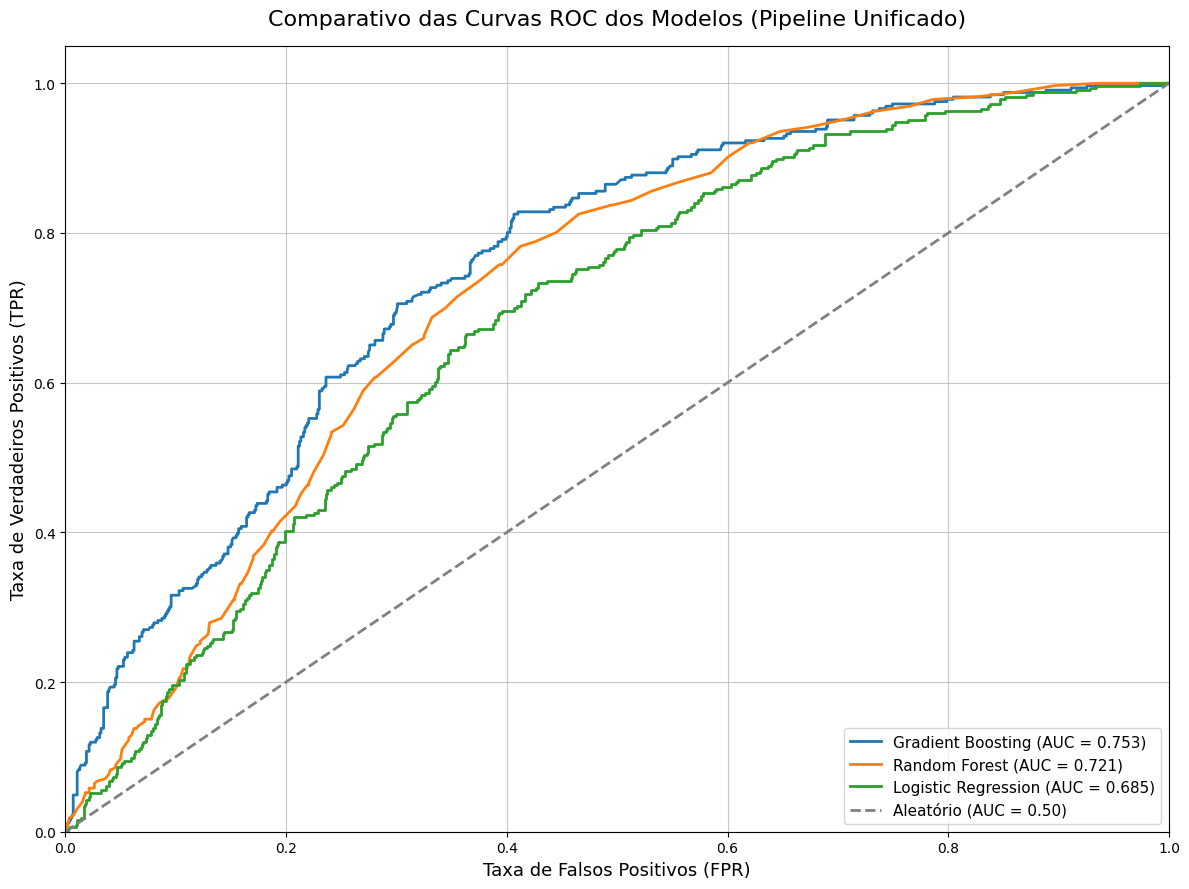


     🏆  T A B E L A   C O M P A R A T I V A   D E   M É T R I C A S  🏆
╒═════════════════════╤════════════════╤══════════════════════════════════╤═══════════════════════════════╤═════════════════════════════════╤═══════╕
│ Modelo              │   Acurácia (%) │   Precision Média (ponderada, %) │   Recall Médio (ponderado, %) │   F1-Score Médio (ponderado, %) │   AUC │
╞═════════════════════╪════════════════╪══════════════════════════════════╪═══════════════════════════════╪═════════════════════════════════╪═══════╡
│ Gradient Boosting   │         74.483 │                           72.187 │                        74.483 │                          69.774 │ 0.753 │
├─────────────────────┼────────────────┼──────────────────────────────────┼───────────────────────────────┼─────────────────────────────────┼───────┤
│ Random Forest       │         70.345 │                           67.084 │                        70.345 │                          67.834 │ 0.721 │
├─────────────────────┼─────

In [ ]:
# # Treinamento dos Modelos Base e Avaliação Inicial
#
# Esta seção é dedicada ao treinamento e à avaliação inicial de diferentes
# algoritmos de classificação. O objetivo é ter uma primeira comparação
# de desempenho entre eles, utilizando o pré-processador definido anteriormente
# e avaliando-os no conjunto de teste interno (X_test, y_test).
#
# O processo envolve:
# 1. Definir a classe positiva e preparar os rótulos verdadeiros para a curva ROC.
# 2. Especificar os modelos de classificação a serem testados.
# 3. Iterar sobre cada modelo:
#    a. Criar um pipeline completo, combinando o pré-processador com o classificador.
#    b. Treinar o pipeline com os dados de treino (X_train, y_train).
#    c. Calcular as probabilidades para a curva ROC e o valor AUC.
#    d. Fazer previsões de classe para calcular métricas como acurácia,
#       precision, recall e F1-score.
# 4. Plotar as curvas ROC de todos os modelos em um único gráfico.
# 5. Exibir uma tabela comparativa com as principais métricas de desempenho.

# =====================================================
# Treino, ROC e Tabela de Métricas
# =====================================================
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from tabulate import tabulate
import pandas as pd

# --- Início da Saída Melhorada ---
print("\n" + "="*70)
print("     📊  T R E I N A M E N T O   E   A V A L I A Ç Ã O   📊")
print("="*70)
# --- Fim da Saída Melhorada ---

# =======================================================================
# Definição da Classe Positiva e Preparação dos Rótulos para ROC
# =======================================================================
# 'positive_class_label' (definida globalmente) é usada para identificar
# nossa classe de interesse. 'positive_class_index' armazena o índice
# numérico dessa classe (0 ou 1) conforme aprendido pelo LabelEncoder
# ou pela ordem das classes. 'y_true_positive' é uma versão binária
# de y_test, onde 1 representa a classe positiva e 0 a outra,
# usada para calcular a curva ROC.
unique_classes = sorted(list(y_test.astype(str).unique()))
positive_class_index = unique_classes.index(str(positive_class_label))
y_true_positive = (y_test == positive_class_label).astype(int)
print(f"\n[CONFIGURAÇÃO] Classe positiva para ROC: '{positive_class_label}' (índice {positive_class_index}).")

# =======================================================================
# Definição dos Modelos de Classificação a Serem Testados
# =======================================================================
# Dicionário 'classifiers_defs' contendo os estimadores que serão
# comparados. Cada um é instanciado com 'random_state=42' para
# reprodutibilidade.
classifiers_defs = {
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
}
print("[CONFIGURAÇÃO] Modelos a serem treinados e avaliados definidos.")

# =======================================================================
# Loop de Treinamento, Geração de Curva ROC e Coleta de Métricas
# =======================================================================
# Prepara a figura para plotar as curvas ROC de todos os modelos.
plt.figure(figsize=(12, 9)) # Ajuste no tamanho para melhor visualização
results_list = [] # Lista para armazenar os resultados para a tabela final.

print("\n[PROCESSAMENTO] Iniciando ciclo de treino e avaliação para cada modelo...")
for name, classifier in classifiers_defs.items():
    # --- Início da Saída Melhorada ---
    print(f"\n  ----------------------------------------------------")
    print(f"  🚀 Treinando e Avaliando: {name}")
    print(f"  ----------------------------------------------------")
    # --- Fim da Saída Melhorada ---

    # Cria um pipeline completo, juntando o 'preprocessor' (definido na
    # seção anterior) com o classificador atual.
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('classifier', classifier)])

    # Treina o pipeline com os dados de treino (X_train, y_train).
    # O pré-processamento é aplicado automaticamente aos dados de treino.
    model_pipeline.fit(X_train, y_train)
    print(f"     ✅ Modelo '{name}' treinado com sucesso.")

    # Cálculo para a Curva ROC:
    # Obtém as probabilidades da classe positiva para o conjunto de teste.
    # O pré-processamento é aplicado automaticamente a X_test.
    y_score = model_pipeline.predict_proba(X_test)[:, positive_class_index]
    fpr, tpr, _ = roc_curve(y_true_positive, y_score)
    roc_auc = auc(fpr, tpr)
    # Plota a curva ROC para o modelo atual.
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.3f})") # AUC com 3 casas decimais
    print(f"     📈 AUC (Curva ROC) para '{name}': {roc_auc:.4f}")

    # Cálculo para a Tabela de Métricas:
    # Faz as previsões de classe (0 ou 1) no conjunto de teste.
    y_pred = model_pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    # Armazena as métricas calculadas.
    results_list.append({
        "Modelo": name,
        "Acurácia (%)": accuracy * 100,
        "Precision Média (ponderada, %)": report["weighted avg"]["precision"] * 100,
        "Recall Médio (ponderado, %)": report["weighted avg"]["recall"] * 100,
        "F1-Score Médio (ponderado, %)": report["weighted avg"]["f1-score"] * 100,
        "AUC": roc_auc # Adicionando AUC à lista para a tabela
    })
    print(f"     📋 Métricas de classificação para '{name}' coletadas.")

# =======================================================================
# Configuração e Exibição do Gráfico da Curva ROC
# =======================================================================
# Adiciona a linha de referência (classificador aleatório) ao gráfico.
plt.plot([0, 1], [0, 1], color="grey", lw=2, linestyle="--", label="Aleatório (AUC = 0.50)")
# Configurações visuais do gráfico.
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taxa de Falsos Positivos (FPR)", fontsize=13)
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)", fontsize=13)
plt.title("Comparativo das Curvas ROC dos Modelos (Pipeline Unificado)", fontsize=16, loc="center", pad=15)
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.7)
plt.tight_layout()
print("\n[VISUALIZAÇÃO] Exibindo gráfico das Curvas ROC...")

# PDF VETORIZADO
plt.tight_layout()
plt.savefig("roc_curve_pt.pdf", format="pdf", bbox_inches="tight")

plt.show() # Exibe o gráfico.

# =======================================================================
# Exibição da Tabela Comparativa de Métricas
# =======================================================================
# Cria um DataFrame com os resultados e ordena pelo F1-Score.
# Adicionamos o AUC na tabela para uma comparação mais completa.
results_df = pd.DataFrame(results_list).sort_values(by="F1-Score Médio (ponderado, %)", ascending=False)

# --- Início da Saída Melhorada ---
print("\n" + "="*70)
print("     🏆  T A B E L A   C O M P A R A T I V A   D E   M É T R I C A S  🏆")
print("="*70)
print(tabulate(
    results_df.round(3), # Métricas com 3 casas decimais
    headers="keys",
    tablefmt="fancy_grid", # Usando um formato diferente para a tabela
    showindex=False
))



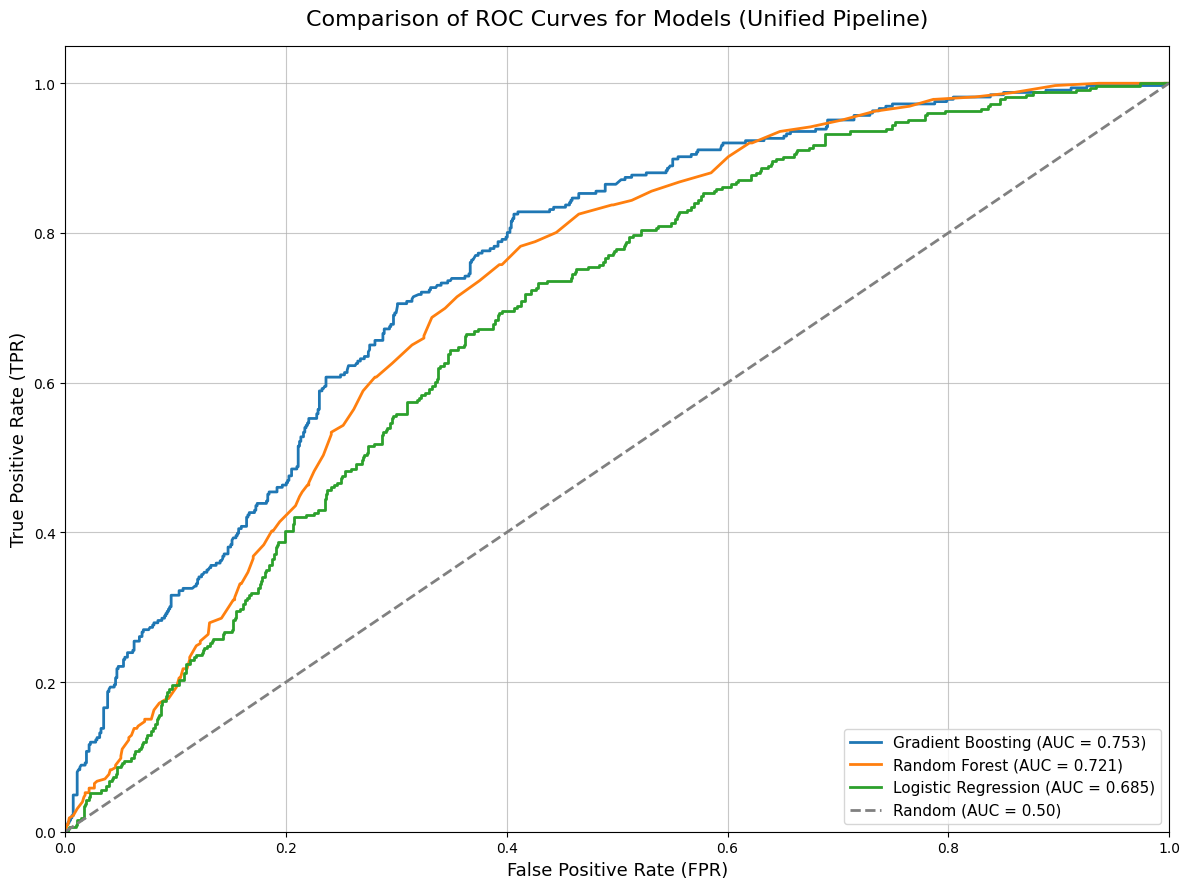

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Define the positive class for ROC computation
unique_classes = sorted(list(y_test.astype(str).unique()))
positive_class_index = unique_classes.index(str(positive_class_label))
y_true_positive = (y_test == positive_class_label).astype(int)

# Define models
classifiers_defs = {
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
}

# Plot ROC curves
plt.figure(figsize=(12, 9))

for name, classifier in classifiers_defs.items():
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('classifier', classifier)])
    model_pipeline.fit(X_train, y_train)

    y_score = model_pipeline.predict_proba(X_test)[:, positive_class_index]
    fpr, tpr, _ = roc_curve(y_true_positive, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.3f})")

# Add baseline (random) curve
plt.plot([0, 1], [0, 1], color="grey", lw=2, linestyle="--", label="Random (AUC = 0.50)")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (FPR)", fontsize=13)
plt.ylabel("True Positive Rate (TPR)", fontsize=13)
plt.title("Comparison of ROC Curves for Models (Unified Pipeline)", fontsize=16, pad=15)
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.7)
plt.tight_layout()

plt.tight_layout()
plt.savefig("roc_curve_eng.pdf", format="pdf", bbox_inches="tight")

#TESTES

In [ ]:
# =======================================================================
# Função para Executar o Teste Final (VERSÃO FINAL E AUTOSSUFICIENTE)
# =======================================================================
def executar_teste_final(caminho_arquivo_teste, pipeline_treinado):
    """
    Processa um arquivo de teste e avalia o pipeline final.
    Esta versão é autossuficiente e cria seu próprio LabelEncoder.
    """
    global limiar_max_recall, positive_class_label # Continua usando as globais de configuração

    try:
        df_teste = pd.read_csv(caminho_arquivo_teste, delimiter=';', on_bad_lines='skip')

        # Funções de tratamento...
        df_teste = criar_tempo_relacionamento(df_teste)
        df_teste = criar_flag_lista_vigilancia(df_teste)
        df_teste = remover_colunas_irrelevantes(df_teste)
        df_teste = remover_parecer_ausente(df_teste)
        df_teste = limpar_e_converter_numericos(df_teste)
        df_teste = remover_renda_negativa(df_teste)

        X_teste_final = df_teste.drop(columns=["PARECER"])
        y_teste_final = df_teste["PARECER"]

        # --- NOVA LÓGICA DE TRADUÇÃO ---
        # Cria um LabelEncoder local para fazer a tradução
        le_local = LabelEncoder()
        # "Aprende" as classes a partir dos dados de teste que acabamos de carregar
        le_local.fit(y_teste_final)
        # --- FIM DA NOVA LÓGICA ---

        probabilidades = pipeline_treinado.predict_proba(X_teste_final)

        # Agora, usamos o le_local para fazer as traduções
        idx_classe_positiva = list(le_local.classes_).index(positive_class_label)
        classe_alternativa = le_local.classes_[1 - idx_classe_positiva]

        prob_classe_positiva = probabilidades[:, idx_classe_positiva]

        y_pred_final = np.where(prob_classe_positiva >= limiar_max_recall,
                                positive_class_label,
                                classe_alternativa)

        acuracia = accuracy_score(y_teste_final, y_pred_final)
        print(f"\n   🎯 Acurácia Geral ({caminho_arquivo_teste}, Limiar {limiar_max_recall:.2f}): {acuracia:.2%}\n")

        report_dict = classification_report(y_teste_final, y_pred_final,
                                            target_names=le_local.classes_, # Usando le_local
                                            output_dict=True, zero_division=0)
        report_df = pd.DataFrame(report_dict).transpose()
        report_df['support'] = report_df['support'].astype(float).astype(int)
        print("   📊 Relatório de Classificação:")
        print(tabulate(report_df.round(4), headers="keys", tablefmt="grid", showindex=True))

        cm = confusion_matrix(y_teste_final, y_pred_final, labels=le_local.classes_) # Usando le_local
        cm_df = pd.DataFrame(cm,
                             index=[f"Real: {l}" for l in le_local.classes_],
                             columns=[f"Previsto: {l}" for l in le_local.classes_])
        print("\n   🔢 Matriz de Confusão:")
        print(tabulate(cm_df, headers="keys", tablefmt="grid", showindex=True))

    except FileNotFoundError:
        print(f"❌ ERRO: Arquivo de teste '{caminho_arquivo_teste}' não encontrado.")
    except Exception as e:
        print(f"❌ ERRO INESPERADO ao processar o arquivo '{caminho_arquivo_teste}': {e}")

In [ ]:
# # Treinamento do Modelo Final com Hiperparâmetros Otimizados
#
# Esta célula é responsável por construir e treinar o pipeline de modelagem
# definitivo. Ela utiliza os melhores hiperparâmetros para o Gradient Boosting,
# que foram determinados em uma etapa anterior de otimização (por exemplo,
# via RandomizedSearchCV ou GridSearchCV).
#
# O processo aqui é:
# 1. Definir o dicionário 'best_params' contendo os valores otimizados.
# 2. Instanciar o GradientBoostingClassifier com esses parâmetros.
# 3. Integrar este classificador com o 'preprocessor' (definido anteriormente,
#    que lida com a transformação de features) para formar o 'final_pipeline'.
# 4. Treinar este 'final_pipeline' usando os conjuntos X_train e y_train
#    preparados nas etapas anteriores.
#
# O 'final_pipeline' resultante será o modelo completo e treinado, pronto
# para ser usado nas avaliações finais nos conjuntos de teste e para
# a geração das explicações SHAP. O bloco try-except garante que
# erros, como a falta de variáveis pré-definidas, sejam capturados.

# =======================================================================
# Cria e Treina o Pipeline Final com Parâmetros Otimizados
# (O número "4.2" no comentário abaixo é do seu código original)
# =======================================================================
try:
    print(f"   [CONFIGURAÇÃO] Hiperparâmetros otimizados para Gradient Boosting definidos.")

    # Instanciação do modelo Gradient Boosting.
    # 'random_state' é usado para reprodutibilidade.
    # '**best_params' desempacota o dicionário, passando cada item
    # como um argumento nomeado para o construtor do classificador.
    final_model = GradientBoostingClassifier(random_state=42, **best_params)

    # Montagem do pipeline final.
    # Este pipeline primeiro aplicará as transformações definidas no 'preprocessor'
    # (tratamento de categóricas, numéricas, etc.) e, em seguida, passará
    # os dados processados para o 'final_model' (Gradient Boosting) para o aprendizado.
    final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('classifier', final_model)])
    print(f"   [INFO] Pipeline final ('final_pipeline') montado. Iniciando treinamento...")

    # Treinamento do pipeline completo com os dados de treino (X_train, y_train).
    # Estes dados devem ter sido preparados e divididos nas etapas anteriores do script.
    final_pipeline.fit(X_train, y_train)
    print(f"   ✅ Modelo final ('final_pipeline') treinado com sucesso e pronto para uso.")

except NameError as ne:
    print(f"❌ ERRO AO TREINAR: Variável '{ne.name}' não foi definida.")
    print(f"   Certifique-se de que 'preprocessor', 'X_train' e 'y_train' existem e foram carregados/definidos corretamente.")
    exit() # Interrompe se variáveis essenciais não estiverem disponíveis
except Exception as e:
    print(f"❌ ERRO INESPERADO durante o treinamento do pipeline final: {e}")
    exit() # Interrompe em caso de outros erros

   [CONFIGURAÇÃO] Hiperparâmetros otimizados para Gradient Boosting definidos.
   [INFO] Pipeline final ('final_pipeline') montado. Iniciando treinamento...
   ✅ Modelo final ('final_pipeline') treinado com sucesso e pronto para uso.


# RESULTADO

In [ ]:
# =======================================================================
# Executa os Testes
# =======================================================================
# Usa as variáveis 'test_path' da sua INICIALIZAÇÃO
executar_teste_final(test_path, final_pipeline)


   🎯 Acurácia Geral (pld-test.csv, Limiar 0.15): 57.93%

   📊 Relatório de Classificação:
+---------------+-------------+----------+------------+-----------+
|               |   precision |   recall |   f1-score |   support |
+===============+=============+==========+============+===========+
| COMUNICAR     |      0.3919 |   0.9113 |     0.5481 |       406 |
+---------------+-------------+----------+------------+-----------+
| NAO_COMUNICAR |      0.9289 |   0.4502 |     0.6065 |      1044 |
+---------------+-------------+----------+------------+-----------+
| accuracy      |      0.5793 |   0.5793 |     0.5793 |         0 |
+---------------+-------------+----------+------------+-----------+
| macro avg     |      0.6604 |   0.6808 |     0.5773 |      1450 |
+---------------+-------------+----------+------------+-----------+
| weighted avg  |      0.7785 |   0.5793 |     0.5901 |      1450 |
+---------------+-------------+----------+------------+-----------+

   🔢 Matriz de Confusão:

In [ ]:
# ============================================
# AVALIAÇÃO MULTILIMIAR (um cenário por vez)
# Usa o pipeline treinado atual (final_pipeline)
# e mede métricas para vários limiares.
# ============================================
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from tabulate import tabulate

# Flags de cenário
criar_coolunas_proporcao_valor_renda = True
criar_coluna_gap_log_valor_renda     = True

def _infer_pos_neg_labels(clf_classes, y_true):
    """Infere o rótulo positivo/negativo."""
    classes_est = pd.Index(clf_classes).astype(str)
    if "COMUNICAR" in classes_est:
        pos = "COMUNICAR"
    else:
        pos = classes_est[0]
    y_classes = pd.Index(pd.Series(y_true).astype(str).unique())
    neg_candidates = [c for c in y_classes if c != pos]
    neg = neg_candidates[0] if len(neg_candidates) else [c for c in classes_est if c != pos][0]
    return str(pos), str(neg)

def avaliar_modelo_em_th(pipe, X, y, thresh, pos_label=None, neg_label=None):
    """Avalia um pipeline em um único limiar e retorna métricas + confusão."""
    clf = pipe.named_steps["classifier"]
    if pos_label is None or neg_label is None:
        pos_label, neg_label = _infer_pos_neg_labels(clf.classes_, y)

    classes_est = pd.Index(clf.classes_).astype(str)
    pos_idx = int(np.where(classes_est == pos_label)[0][0])

    proba_pos = pipe.predict_proba(X)[:, pos_idx]
    y_hat = np.where(proba_pos >= float(thresh), pos_label, neg_label)

    acc  = accuracy_score(y, y_hat)
    prec = precision_score(y, y_hat, pos_label=pos_label, zero_division=0)
    rec  = recall_score(y, y_hat, pos_label=pos_label, zero_division=0)

    cm = confusion_matrix(y, y_hat, labels=[pos_label, neg_label])
    TP, FN = int(cm[0,0]), int(cm[0,1])
    FP, TN = int(cm[1,0]), int(cm[1,1])

    return {
        "threshold": float(thresh),
        "accuracy": float(acc),
        "precision_pos": float(prec),
        "recall_pos": float(rec),
        "TP": TP, "FP": FP, "TN": TN, "FN": FN
    }

def avaliar_multilimites(pipe, X, y, thresholds=(0.10,0.15,0.20,0.25,0.30), save_csv_path=None):
    """Avalia uma lista de limiares e imprime uma tabela formatada."""
    clf = pipe.named_steps["classifier"]
    pos_label, neg_label = _infer_pos_neg_labels(clf.classes_, y)

    rows = [avaliar_modelo_em_th(pipe, X, y, th, pos_label, neg_label) for th in thresholds]
    df_res = pd.DataFrame(rows).sort_values("threshold").reset_index(drop=True)

    for c in ["accuracy","precision_pos","recall_pos"]:
        df_res[c] = df_res[c].map(lambda v: round(float(v), 4))

    print("\n" + "="*70)
    print("   📊 MÉTRICAS por LIMIAR (cenário atual do pipeline) ")
    print("="*70)
    print(f"   🔧 Features derivadas incluídas:")
    print(f"      - PROPORCAO_VALOR_RENDA: {criar_coolunas_proporcao_valor_renda}")
    print(f"      - GAP_LOG_VALOR_RENDA  : {criar_coluna_gap_log_valor_renda}")
    print("-"*70)
    print(tabulate(df_res, headers="keys", tablefmt="fancy_grid", showindex=False, floatfmt=".4f"))

    if save_csv_path:
        df_res.to_csv(save_csv_path, index=False)
        print(f"\n📁 Resultados salvos em: {save_csv_path}")

    return df_res

# Executa avaliação multilimiar
df_resultados = avaliar_multilimites(
    final_pipeline, X_test, y_test,
    thresholds=[0.10,0.15,0.20,0.25,0.30],
    save_csv_path=None
)


   📊 MÉTRICAS por LIMIAR (cenário atual do pipeline) 
   🔧 Features derivadas incluídas:
      - PROPORCAO_VALOR_RENDA: True
      - GAP_LOG_VALOR_RENDA  : True
----------------------------------------------------------------------
╒═════════════╤════════════╤═════════════════╤══════════════╤══════════╤══════════╤══════════╤══════════╕
│   threshold │   accuracy │   precision_pos │   recall_pos │       TP │       FP │       TN │       FN │
╞═════════════╪════════════╪═════════════════╪══════════════╪══════════╪══════════╪══════════╪══════════╡
│      0.1000 │     0.4957 │          0.3537 │       0.9601 │ 313.0000 │ 572.0000 │ 262.0000 │  13.0000 │
├─────────────┼────────────┼─────────────────┼──────────────┼──────────┼──────────┼──────────┼──────────┤
│      0.1500 │     0.5767 │          0.3904 │       0.9018 │ 294.0000 │ 459.0000 │ 375.0000 │  32.0000 │
├─────────────┼────────────┼─────────────────┼──────────────┼──────────┼──────────┼──────────┼──────────┤
│      0.2000 │     0.631

In [ ]:
# ============================================================
# Preparação + Cálculo das métricas agregadas (ROC e PR)
# Requisitos: X_test, y_test, final_pipeline já definidos.
# ============================================================
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# 1) rótulo binário (1 = COMUNICAR)
y_true = (y_test.astype(str).str.upper() == "COMUNICAR").astype(int).values

# 2) descobre a coluna da classe positiva em predict_proba
pos_idx = 1  # fallback
classes_attr = getattr(final_pipeline, "classes_", None)
if classes_attr is None and hasattr(final_pipeline, "named_steps"):
    for _name, _step in final_pipeline.named_steps.items():
        if hasattr(_step, "classes_"):
            classes_attr = _step.classes_
            break
if classes_attr is not None:
    classes_list = list(classes_attr)
    if "COMUNICAR" in classes_list:
        pos_idx = classes_list.index("COMUNICAR")
    elif 1 in classes_list:
        pos_idx = classes_list.index(1)

# 3) probabilidade da classe positiva
y_score = final_pipeline.predict_proba(X_test)[:, pos_idx]

# 4) métricas ROC
fpr, tpr, _ = roc_curve(y_true, y_score, pos_label=1)
auc_roc = auc(fpr, tpr)

# 5) métricas PR
precision, recall, _ = precision_recall_curve(y_true, y_score, pos_label=1)
aupr = average_precision_score(y_true, y_score)
base_precision = (y_true == 1).mean()  # prevalência

# 6) resumo
try:
    from tabulate import tabulate
    print(tabulate([
        ["AUC-ROC", f"{auc_roc:.6f}"],
        ["AUPR", f"{aupr:.6f}"],
        ["Baseline precision (prevalência positiva)", f"{base_precision:.6f}"],
        ["Índice da classe positiva (predict_proba)", str(pos_idx)]
    ], headers=["Métrica", "Valor"], tablefmt="github"))
except Exception:
    print(f"AUC-ROC: {auc_roc:.6f}")
    print(f"AUPR   : {aupr:.6f}")
    print(f"Baseline precision (prevalência positiva): {base_precision:.6f}")
    print(f"Índice da classe positiva (predict_proba): {pos_idx}")

| Métrica                                   |    Valor |
|-------------------------------------------|----------|
| AUC-ROC                                   | 0.750703 |
| AUPR                                      | 0.507116 |
| Baseline precision (prevalência positiva) | 0.281034 |
| Índice da classe positiva (predict_proba) | 0        |


#EXPLICAÇÃO


In [ ]:
import shap
import numpy as np
import pandas as pd # Adicionado, pois pd.Series é usado

# # Geração de Explicações Textuais SHAP para Decisões do Modelo
#
# A função 'gerar_explicacoes' tem como objetivo fornecer uma interpretação
# em linguagem natural para as previsões individuais do modelo, utilizando
# os valores SHAP (SHapley Additive exPlanations).
#
# Para cada instância nos dados de entrada 'X', a função:
# 1. Realiza o pré-processamento necessário utilizando o 'preprocessor'
#    embutido no 'pipeline' fornecido. O 'X' passado para esta função
#    deve ser o conjunto de dados original (antes do pré-processamento do pipeline).
# 2. Utiliza um 'shap.TreeExplainer', que é adequado para modelos baseados
#    em árvores como Gradient Boosting ou Random Forest (o classificador
#    dentro do pipeline). Este explainer calcula os valores SHAP, que
#    quantificam a contribuição de cada feature para a previsão.
# 3. Trata a estrutura dos 'shap_values' retornados. Para classificadores
#    com saída de probabilidade para múltiplas classes (como no caso binário),
#    o TreeExplainer geralmente retorna uma lista de arrays de valores SHAP,
#    um array para cada classe. A função tenta separar esses valores.
# 4. Obtém as probabilidades previstas pelo classificador do pipeline para
#    cada classe ('COMUNICAR' e 'NAO_COMUNICAR', assumindo essa ordem).
# 5. Determina a 'decisao' textual ('Comunicar' ou 'Não comunicar') com
#    base em um limiar de probabilidade fixo de 0.5 aplicado à
#    probabilidade da classe 'COMUNICAR'.
#    (Importante: este limiar de 0.5 é específico desta função de explicação
#    e é independente do 'limiar_max_recall' usado para otimizar métricas).
# 6. Com base na 'decisao', seleciona o conjunto apropriado de valores SHAP
#    (seja para 'COMUNICAR' ou 'NAO_COMUNICAR') para explicar aquela decisão.
# 7. Identifica as três features com o maior impacto absoluto (positivo ou
#    negativo) na previsão para a instância e classe específicas.
# 8. Constrói uma frase explicativa em português, resumindo a decisão, as
#    probabilidades previstas e o impacto das features mais relevantes.
#
# A função retorna uma Série Pandas, onde cada linha contém a explicação
# textual para a instância correspondente nos dados de entrada 'X'.
# Um bloco try-except está incluído para tratamento de erros.

def gerar_explicacoes(pipeline, X: pd.DataFrame, y_pred: pd.Series) -> pd.Series:
    """
    Gera explicações SHAP de forma simples e direta para cada instância.

    Args:
        pipeline (Pipeline): O pipeline completo e treinado, contendo
                             os passos 'preprocessor' e 'classifier'.
        X (pd.DataFrame): DataFrame com os dados de entrada (features originais,
                          antes do pré-processamento do pipeline).
        y_pred (pd.Series): Previsões realizadas pelo modelo para X.
                            (Nota: na lógica atual da função, esta y_pred não é
                             usada para determinar a 'decisao' para a explicação,
                             pois a função recalcula a decisão com base em P(COMUNICAR) >= 0.5).

    Returns:
        pd.Series: Uma série Pandas contendo as explicações textuais,
                   com o mesmo índice de X.
    """
    try:
        # Aplica o pré-processamento (transformações) aos dados de entrada X
        # usando o passo 'preprocessor' do pipeline.
        preprocessed_X = pipeline.named_steps["preprocessor"].transform(X)
        # Garante que o resultado seja um array numpy denso, se não for.
        if not isinstance(preprocessed_X, np.ndarray):
            preprocessed_X = preprocessed_X.toarray()

        # Inicializa o TreeExplainer com o modelo classificador do pipeline.
        # É esperado que o classificador seja um modelo baseado em árvore
        # (ex: GradientBoostingClassifier, RandomForestClassifier).
        explainer = shap.TreeExplainer(pipeline.named_steps["classifier"])
        # Calcula os valores SHAP. Para modelos scikit-learn com predict_proba,
        # isso geralmente retorna uma lista de arrays [shap_values_classe0, shap_values_classe1].
        shap_values = explainer.shap_values(preprocessed_X)

        # Tratamento da estrutura de shap_values.
        # Se for uma lista de dois elementos (comum para classificação binária),
        # assume-se que shap_values[0] são para a classe 'COMUNICAR' (índice 0)
        # e shap_values[1] para 'NAO_COMUNICAR' (índice 1).
        if isinstance(shap_values, list) and len(shap_values) == 2:
            shap_values_para_comunicar = shap_values[0] # Para P(Comunicar)
            shap_values_para_nao_comunicar = shap_values[1] # Para P(Nao Comunicar)
        else:
            # Se não for uma lista de 2, pode ser uma única matriz (explicando uma única saída do modelo)
            # ou uma estrutura diferente. Neste caso, ambas as variáveis apontarão
            # para a mesma matriz, o que pode não ser o ideal se a lógica subsequente
            # espera valores SHAP distintos por classe.
            # Dado o aviso anterior sobre a saída SHAP ser uma única matriz (provavelmente para NAO_COMUNICAR),
            # esta lógica pode precisar de ajuste se quisermos explicações precisas para ambas as decisões
            # baseadas em SHAP values específicos para cada classe.
            # No momento, se shap_values é único, ambas as vars abaixo usarão ele.
            print("   [AVISO SHAP] shap_values não é uma lista de 2. Usando a mesma matriz para ambas as classes na lógica de seleção.")
            shap_values_para_comunicar = shap_values
            shap_values_para_nao_comunicar = shap_values

        # Obtém as probabilidades previstas pelo modelo para cada classe.
        probabilidades = pipeline.named_steps["classifier"].predict_proba(preprocessed_X)
        # Recupera os nomes das features após todas as transformações do preprocessor.
        feature_names = pipeline.named_steps["preprocessor"].get_feature_names_out()

        explanations = []
        # Itera sobre cada instância (linha) dos dados de entrada.
        for i, prob_por_classe in enumerate(probabilidades):
            # Assume que prob_por_classe[0] é a P(COMUNICAR) e prob_por_classe[1] é P(NAO_COMUNICAR).
            prob_comunicar = prob_por_classe[0] * 100
            prob_nao_comunicar = prob_por_classe[1] * 100

            # Determina a decisão do modelo com base em um limiar de 0.5 para P(COMUNICAR).
            # Seleciona os valores SHAP correspondentes à classe prevista.
            if prob_comunicar >= 50:
                decisao = "Comunicar"
                # Explica a decisão de 'Comunicar' usando os SHAP values para 'COMUNICAR'.
                shap_values_instancia_classe = shap_values_para_comunicar[i]
            else:
                decisao = "Não comunicar"
                # Explica a decisão de 'Não comunicar' usando os SHAP values para 'NAO_COMUNICAR'.
                shap_values_instancia_classe = shap_values_para_nao_comunicar[i]

            # Ordena as features pela magnitude do seu impacto SHAP para esta instância e classe.
            # Pega as top 3 features mais influentes.
            feature_impact = sorted(
                zip(feature_names, shap_values_instancia_classe),
                key=lambda x: abs(x[1]), # Ordena pelo valor absoluto do SHAP
                reverse=True
            )[:3]

            # Monta a descrição do impacto de cada uma das top features.
            explanation_parts = [
                f"{feature} {'aumentou' if impact > 0 else 'reduziu'} a probabilidade em {abs(impact) * 100:.1f}%"
                for feature, impact in feature_impact
            ]

            # Constrói a explicação textual final.
            explanation = (
                f"A decisão foi {decisao}. O modelo indicou uma probabilidade de "
                f"{prob_comunicar:.1f}% para comunicar e {prob_nao_comunicar:.1f}% para não comunicar. "
                f"Os principais fatores foram: " + ", ".join(explanation_parts) + "."
            )
            explanations.append(explanation)

        print("✅ Explicações textuais SHAP geradas com sucesso!")
        return pd.Series(explanations, index=X.index, name="EXPLICACAO_DECISAO")

    except Exception as e:
        # Em caso de erro, levanta uma exceção mais informativa.
        raise ValueError(f"Erro durante a geração das explicações SHAP: {e}")

In [ ]:
# ===== PRÉ-BLOCO PARA SHAP SUMMARY PLOT =====
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) Pega preprocessor e classificador do pipeline final
pre = final_pipeline.named_steps['preprocessor']
clf = final_pipeline.named_steps['classifier']

# 2) Transforma o X_test como o pipeline faz
X_test_transformed = pre.transform(X_test)

# 3) Recupera nome das features pós-pipeline e monta DataFrame (para os plots)
feature_names_transformed = pre.get_feature_names_out()
X_test_transformed_df = pd.DataFrame(
    X_test_transformed,
    columns=feature_names_transformed,
    index=X_test.index
)

# 4) Cria o explainer
# Para modelos de árvore do scikit, TreeExplainer funciona bem.
# model_output="probability" ajuda a estabilizar a interpretação em termos de prob.
explainer = shap.TreeExplainer(clf)

# 5) Calcula valores SHAP no espaço transformado
shap_values_raw = explainer.shap_values(X_test_transformed)

# 6) Seleciona a matriz certa para o plot:
#    - Alguns modelos retornam lista [classe0, classe1]. Usamos a classe POSITIVA.
#    - Outros retornam uma única matriz (já serve direto).
if isinstance(shap_values_raw, list):
    # Garante que pegamos o índice da classe positiva conforme o classificador aprendeu:
    classes_ = getattr(clf, "classes_", None)
    if classes_ is not None and positive_class_label in classes_:
        pos_idx = list(classes_).index(positive_class_label)
    else:
        # fallback: usa a última posição (muito comum ser a classe positiva)
        pos_idx = -1
    shap_values_para_plot = shap_values_raw[pos_idx]
else:
    shap_values_para_plot = shap_values_raw

# (Opcional) se quiser reduzir custo de plot, amostra algumas linhas:
# X_plot = X_test_transformed_df.sample(n=min(300, len(X_test_transformed_df)), random_state=42)
# shap_vals_plot = shap_values_para_plot[X_plot.index]
# Caso não queira amostrar, use as linhas completas:
X_plot = X_test_transformed_df
shap_vals_plot = shap_values_para_plot
# ===== FIM DO PRÉ-BLOCO =====

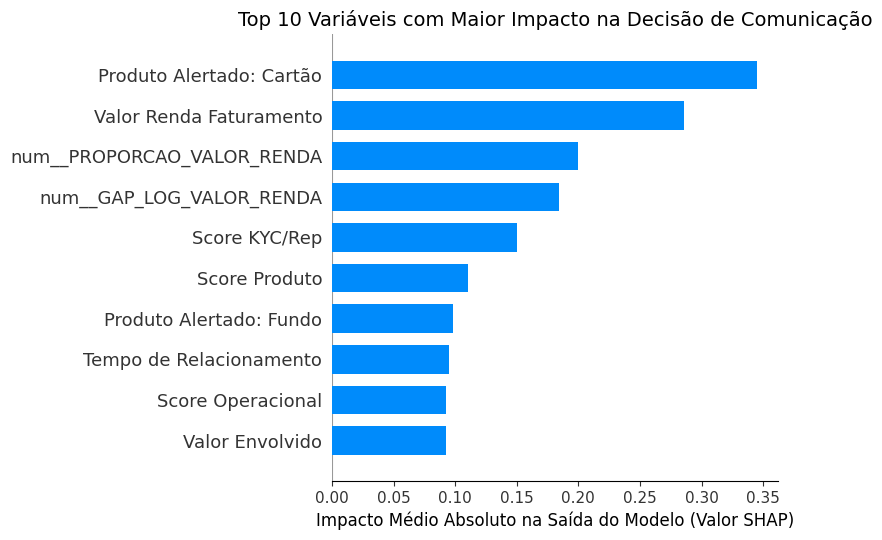

In [ ]:
# =====================================================
# Preparação do DataFrame transformado para o gráfico SHAP
# =====================================================

# Recupera o pré-processador usado no pipeline final
# Isso garante que as mesmas transformações aplicadas no treino sejam usadas aqui
preprocessor_shap = final_pipeline.named_steps['preprocessor']

# Aplica as transformações no conjunto de teste
# O resultado é um array numpy com variáveis já codificadas e escaladas
X_test_transformed = preprocessor_shap.transform(X_test)

# Obtém os nomes das features após o pré-processamento
# Esses nomes trazem prefixos (num__, cat__) que precisam ser traduzidos
feature_names_transformed = preprocessor_shap.get_feature_names_out()

# Constrói um DataFrame com os dados transformados, preservando o índice do X_test
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=feature_names_transformed, index=X_test.index)

# =====================================================
# Dicionário de tradução para nomes amigáveis em PT-BR
# =====================================================

colunas_traduzidas_pt = {
    'num__VALOR RENDA FATURAMENTO': 'Valor Renda Faturamento',
    'num__VALOR ENVOLVIDO': 'Valor Envolvido',
    'num__VALOR SCORE PRODUTO': 'Score Produto',
    'num__VALOR SCORE OPERACIONAL': 'Score Operacional',
    'num__VALOR SCORE KYCREP': 'Score KYC/Rep',
    'num__VALOR SCORE SOCIO': 'Score Sócio',
    'num__VALOR SCORE PARTICIPANTE': 'Score Participante',
    'num__TEMPO DE RELACIONAMENTO': 'Tempo de Relacionamento',
    'cat__PRODUTOS ALERTADOS_Cartão': 'Produto Alertado: Cartão',
    'cat__PRODUTOS ALERTADOS_PortoPar': 'Produto Alertado: Fundo',
    'cat__PRODUTOS ALERTADOS_Outros': 'Produto Alertado: Outros',
    'cat__FLAG LISTA VIGILANCIA_1': 'Flag Lista Vigilância (Sim)',
    'cat__FLAG LISTA VIGILANCIA_0': 'Flag Lista Vigilância (Não)',
    'cat__UF_SP': 'UF: São Paulo',
    'cat__UF_RJ': 'UF: Rio de Janeiro',
    'cat__UF_MG': 'UF: Minas Gerais'
}

# Renomeia as colunas do DataFrame transformado usando o dicionário acima
# Isso remove os prefixos técnicos (num__, cat__) e deixa os nomes legíveis
X_test_transformed_df.rename(columns=colunas_traduzidas_pt, inplace=True)

# =====================================================
# Geração do gráfico SHAP em português
# =====================================================

plt.figure()
shap.summary_plot(
    shap_values_para_plot,          # valores SHAP calculados anteriormente
    X_test_transformed_df,          # DataFrame com colunas já traduzidas
    plot_type="bar",                # gráfico em barras com importância média
    max_display=10,                 # mostra apenas as 10 variáveis mais impactantes
    show=False                      # evita abrir o gráfico automaticamente
)

# Ajustes de título e eixo para PT-BR
plt.title("Top 10 Variáveis com Maior Impacto na Decisão de Comunicação", fontsize=14)
plt.xlabel("Impacto Médio Absoluto na Saída do Modelo (Valor SHAP)", fontsize=12)

# Salva a figura em PDF vetorial para uso em artigos/Overleaf
plt.tight_layout()
plt.savefig("shap_features_pt.pdf", format="pdf", bbox_inches="tight")

# Exibe no notebook
plt.show()

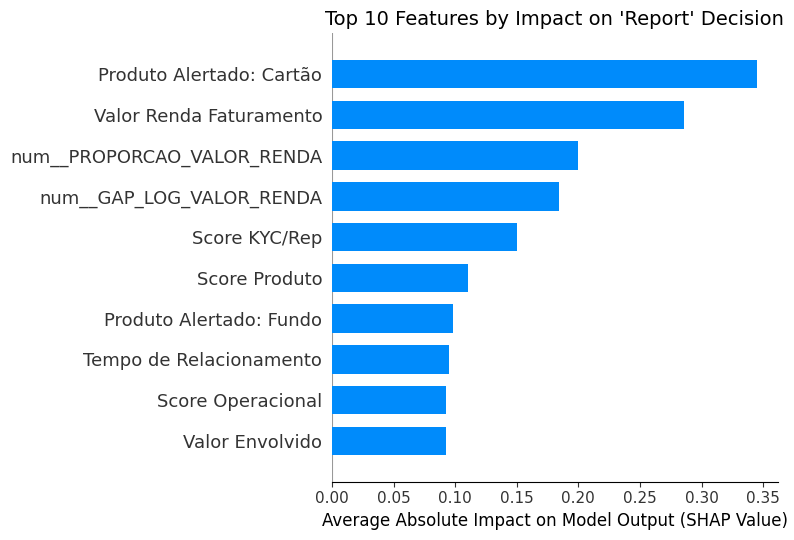

In [ ]:
# 3. Agora traduz os nomes das colunas
X_test_transformed_df.rename(columns=colunas_traduzidas, inplace=True)

# 4. Gráfico em Inglês
plt.figure()
shap.summary_plot(
    shap_values_para_plot,
    X_test_transformed_df,
    plot_type="bar",
    max_display=10,
    show=False
)
plt.title("Top 10 Features by Impact on 'Report' Decision", fontsize=14)
plt.xlabel("Average Absolute Impact on Model Output (SHAP Value)", fontsize=12)
plt.tight_layout()
plt.savefig("shap_features_eng.pdf", format="pdf", bbox_inches="tight")
plt.show()

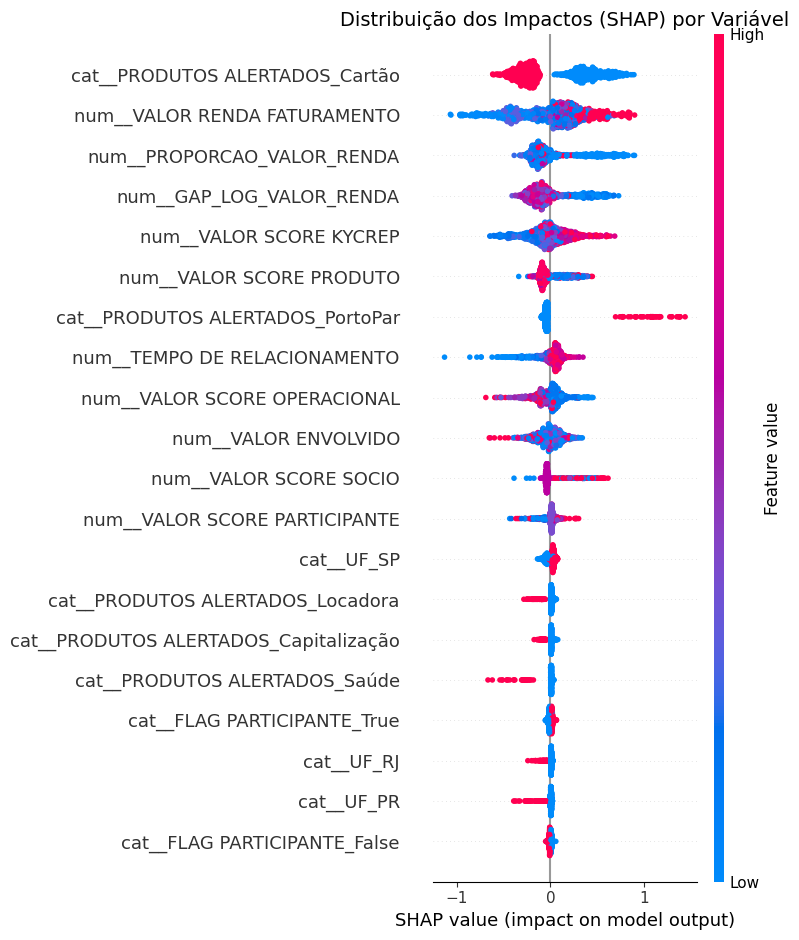

In [ ]:
# Beeswarm (distribuição dos impactos por variável)
plt.figure()
shap.summary_plot(
    shap_vals_plot,
    X_plot,
    max_display=20,
    show=False
)
plt.title("Distribuição dos Impactos (SHAP) por Variável", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# ===================== TOP-K SHAP POR INSTÂNCIA =====================
import numpy as np

def _friendly_feat(name: str) -> str:
    # remove prefixos do ColumnTransformer p/ ficar legível no CSV
    if name.startswith("num__"):
        return name.replace("num__", "", 1)
    if name.startswith("cat__"):
        # mantém apenas a coluna original; se quiser manter a categoria, troque a linha abaixo
        return name.replace("cat__", "", 1).split("_", 1)[0]
    return name

def top3_shap_por_instancia(final_pipeline, X, k: int = 3):
    """
    Retorna uma Series (index = X.index) onde cada célula é uma lista
    de pares (feature_legível, |shap|) com os k atributos de maior impacto
    para a predição daquela instância.
    """
    import shap
    pre = final_pipeline.named_steps["preprocessor"]
    clf = final_pipeline.named_steps["classifier"]

    # transforma X com o preprocessor para calcular SHAP no espaço do modelo
    X_trans = pre.transform(X)

    # tenta TreeExplainer (rápido p/ árvores); se não der, usa Explainer genérico
    try:
        explainer = shap.TreeExplainer(clf)
        shap_vals = explainer.shap_values(X_trans)
        # alguns classificadores retornam lista por classe; escolhemos a de maior dim
        if isinstance(shap_vals, list):
            shap_vals = max(shap_vals, key=lambda a: getattr(a, "shape", [0,0])[1])
    except Exception:
        explainer = shap.Explainer(clf)
        shap_vals = explainer(X_trans).values

    abs_shap = np.abs(shap_vals)
    feat_names = pre.get_feature_names_out()

    top_features = []
    for row in abs_shap:
        idx = np.argsort(row)[::-1][:k]
        feats = [(_friendly_feat(feat_names[i]), float(row[i])) for i in idx]
        top_features.append(feats)

    return pd.Series(top_features, index=X.index)

In [ ]:
# ===================== GERAÇÃO DO CSV (FORMATO FINAL ROBUSTO) =====================
import numpy as np
import pandas as pd

def _pos_label_and_idx(clf, prefer="COMUNICAR"):
    classes = pd.Index(clf.classes_).astype(str)
    pos = prefer if prefer in classes.values else classes[0]
    pos_idx = int(np.where(classes == pos)[0][0])
    return pos, pos_idx

def _exp_text_from_topk(fatores, proba, decisao, k=3):
    """
    fatores = [(nome_feature, abs_shap), ...]
    proba   = prob prevista da classe positiva (float, 0~1)
    decisao = classe prevista (COMUNICAR / NAO_COMUNICAR)
    """
    if not isinstance(fatores, (list, tuple)) or len(fatores) == 0:
        return f"Decisão: {decisao} ({proba*100:.0f}%)"
    vals = np.array([abs(v) for _, v in fatores], dtype=float)
    s = float(vals.sum()) if vals.sum() > 0 else 1.0
    partes = [f"{n} ({(v/s)*100:.0f}%)" for n, v in fatores[:k]]
    return f"Decisão: {decisao} ({proba*100:.0f}%), " + ", ".join(partes)

def gerar_csv_resultados(final_pipeline, X_test, y_test, k_top=3, sep=";"):
    """
    Cria 'pld-result.csv' com as DUAS últimas colunas:
      - PARECER PREVISTO
      - EXPLICACAO DECISAO (classe + prob. + fatores)
    Mantém a coluna PARECER (rótulo verdadeiro).
    Usa o limiar global: limiar_max_recall (já definido no seu notebook).
    """
    # --- 1) Probabilidades e decisão (tudo indexado por X_test.index) ---
    clf = final_pipeline.named_steps["classifier"]
    pos_label, pos_idx = _pos_label_and_idx(clf, prefer="COMUNICAR")

    proba_pos = pd.Series(
        final_pipeline.predict_proba(X_test)[:, pos_idx],
        index=X_test.index
    )
    neg_label = "NAO_COMUNICAR" if pos_label == "COMUNICAR" else "NAO_" + pos_label

    y_pred = pd.Series(
        np.where(proba_pos >= float(limiar_max_recall), pos_label, neg_label),
        index=X_test.index,
        name="PARECER PREVISTO"
    ).astype(str)

    # --- 2) Top-k SHAP por instância, alinhado ao índice ---
    topk_raw = top3_shap_por_instancia(final_pipeline, X_test, k=k_top)
    # força ser uma Series indexada pelo X_test.index
    if isinstance(topk_raw, (list, np.ndarray)):
        topk_series = pd.Series(list(topk_raw), index=X_test.index)
    else:
        # garante mesma ordem e cobertura
        topk_series = pd.Series(index=X_test.index, dtype=object)
        topk_series.loc[topk_raw.index] = topk_raw

    def safe_get_topk(idx):
        try:
            v = topk_series.loc[idx]
            # normaliza: se vier np.ndarray, vira list
            if isinstance(v, np.ndarray):
                v = v.tolist()
            return v if isinstance(v, list) else []
        except Exception:
            return []

    # --- 3) Monta explicações no formato solicitado ---
    exp_txt = []
    for idx in X_test.index:
        fatores = safe_get_topk(idx)
        exp_txt.append(_exp_text_from_topk(fatores, float(proba_pos.loc[idx]), y_pred.loc[idx], k=k_top))
    explicacao = pd.Series(exp_txt, index=X_test.index, name="EXPLICACAO DECISAO")

    # --- 4) DataFrame final: mantém PARECER, adiciona PREVISTO e EXPLICACAO ao fim ---
    df_out = X_test.copy()
    # mantém/garante PARECER (verdadeiro)
    if "PARECER" in df_out.columns:
        # se já existe, não sobrescreve; apenas garante tipo string
        df_out["PARECER"] = df_out["PARECER"].astype(str)
    else:
        df_out["PARECER"] = pd.Series(y_test, index=X_test.index).astype(str)

    df_out["PARECER PREVISTO"] = y_pred
    df_out["EXPLICACAO DECISAO"] = explicacao

    # ordena para que as DUAS últimas sejam exatamente as solicitadas
    cols = [c for c in df_out.columns if c not in ("PARECER PREVISTO", "EXPLICACAO DECISAO")] \
           + ["PARECER PREVISTO", "EXPLICACAO DECISAO"]
    df_out = df_out[cols]

    # --- 5) Salva usando a variável GLOBAL result_path ---
    df_out.to_csv(result_path, sep=sep, index=False)
    print(f"📁 Arquivo salvo em: {result_path}")
    return df_out

# ===== USO =====
# precisa já ter no notebook:
#   - result_path = "pld-result.csv"
#   - limiar_max_recall = 0.15
df_result = gerar_csv_resultados(final_pipeline, X_test, y_test)
display(df_result.head())

📁 Arquivo salvo em: pld-result.csv


,PRODUTOS ALERTADOS,FLAG PEP,FLAG PARTICIPANTE,VALOR RENDA FATURAMENTO,VALOR SCORE KYCREP,VALOR SCORE OPERACIONAL,VALOR SCORE PARTICIPANTE,VALOR SCORE PRODUTO,VALOR SCORE SOCIO,FLAG PROCESSO EXTERNO ABERTO,VALOR ENVOLVIDO,FLAG DOSSIÊ,UF,PROPORCAO_VALOR_RENDA,GAP_LOG_VALOR_RENDA,TEMPO DE RELACIONAMENTO,FLAG LISTA VIGILANCIA,PARECER,PARECER PREVISTO,EXPLICACAO DECISAO
305,Cartão,False,False,6328.69,320.0,600.0,120.0,181.0,130.0,False,66211.05,False,SP,10.462047,2.347611,13.0,0,NAO_COMUNICAR,COMUNICAR,"Decisão: COMUNICAR (47%), VALOR RENDA FATURAME..."
3140,Capitalização,False,False,5000.00,100.0,850.0,120.0,75.0,130.0,False,17000.00,False,SP,3.400000,1.223634,10.0,0,COMUNICAR,COMUNICAR,"Decisão: COMUNICAR (46%), VALOR RENDA FATURAME..."
3685,Cartão,False,True,18236.59,240.0,600.0,240.0,181.0,130.0,False,200720.35,False,DF,11.006463,2.398433,5.0,0,NAO_COMUNICAR,COMUNICAR,"Decisão: COMUNICAR (56%), PRODUTOS ALERTADOS (..."
989,Locadora,False,False,25248.00,120.0,1200.0,120.0,140.0,130.0,False,506928.00,False,SP,20.077947,2.999584,10.0,0,NAO_COMUNICAR,COMUNICAR,"Decisão: COMUNICAR (24%), PRODUTOS ALERTADOS (..."
3418,Locadora,False,False,21147.00,70.0,1200.0,120.0,140.0,130.0,False,638984.00,False,SP,30.216295,3.408336,10.0,0,NAO_COMUNICAR,COMUNICAR,"Decisão: COMUNICAR (17%), PRODUTOS ALERTADOS (..."


# EXTRAS

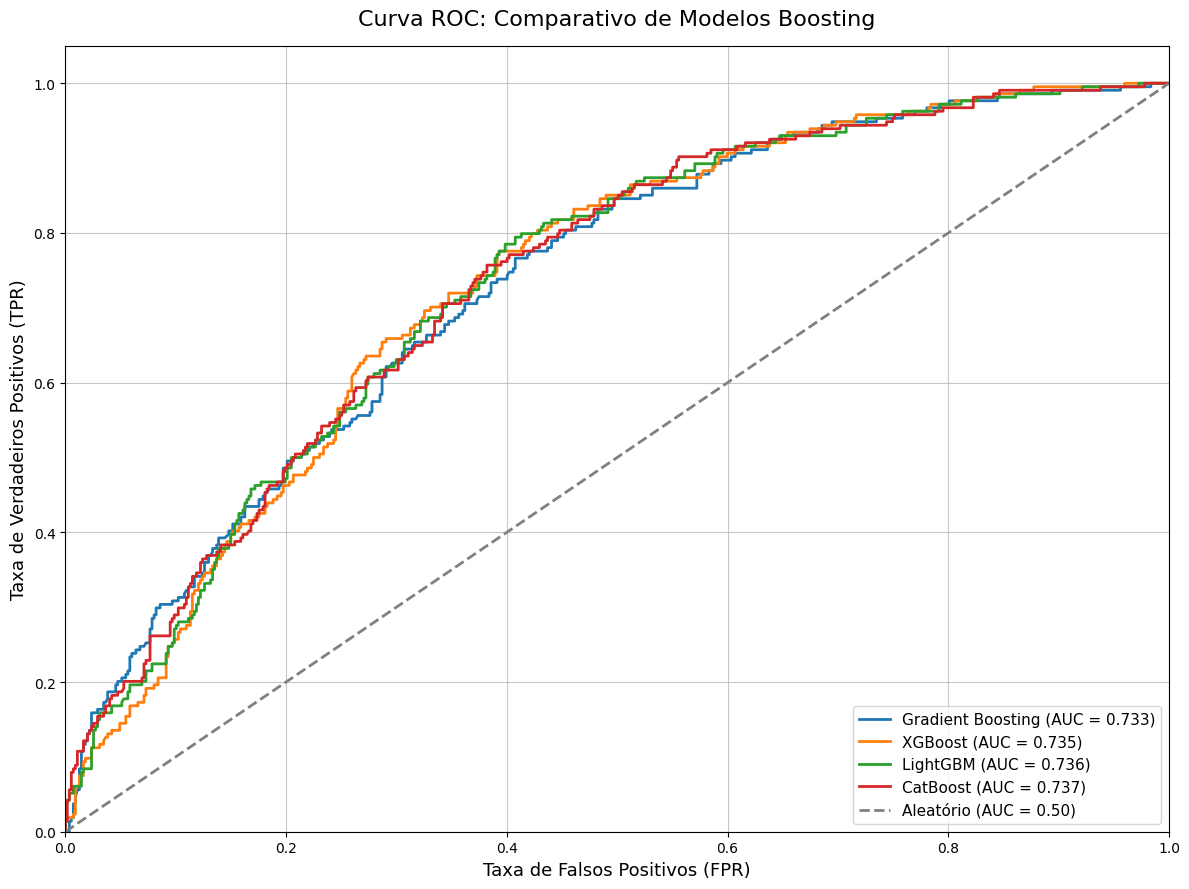

In [ ]:
# =======================================================================
# Gráficos da Curva ROC (Português e Inglês)
# =======================================================================

# 2. Preparação dos dados e modelos
# Codificar a variável-alvo
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Definição dos modelos
modelos_boosting = {
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42, verbose=-1),
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0)
}

# Dicionário para guardar os dados de plotagem
roc_plot_data = {}

# Lógica para a Curva ROC
positive_class_encoded_value = le.transform([positive_class_label])[0]
y_true_positive_extra = (y_test_encoded == positive_class_encoded_value)

# 3. Treinamento dos modelos (executado apenas uma vez)
for name, classifier in modelos_boosting.items():
    pipeline_extra = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', classifier)])
    pipeline_extra.fit(X_train, y_train_encoded)

    # Cálculos para a Curva ROC
    y_score_extra = pipeline_extra.predict_proba(X_test)[:, positive_class_encoded_value]
    fpr, tpr, _ = roc_curve(y_true_positive_extra, y_score_extra)
    roc_auc = auc(fpr, tpr)

    # Guarda os dados para plotar depois
    roc_plot_data[name] = (fpr, tpr, roc_auc)

# =======================================================================
# Gerar Gráfico em Português
# =======================================================================
plt.figure(figsize=(12, 9))
for name, data in roc_plot_data.items():
    fpr, tpr, roc_auc = data
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], color="grey", lw=2, linestyle="--", label="Aleatório (AUC = 0.50)")
plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
plt.xlabel("Taxa de Falsos Positivos (FPR)", fontsize=13)
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)", fontsize=13)
plt.title("Curva ROC: Comparativo de Modelos Boosting", fontsize=16, pad=15)
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.7)
plt.tight_layout()
plt.show()


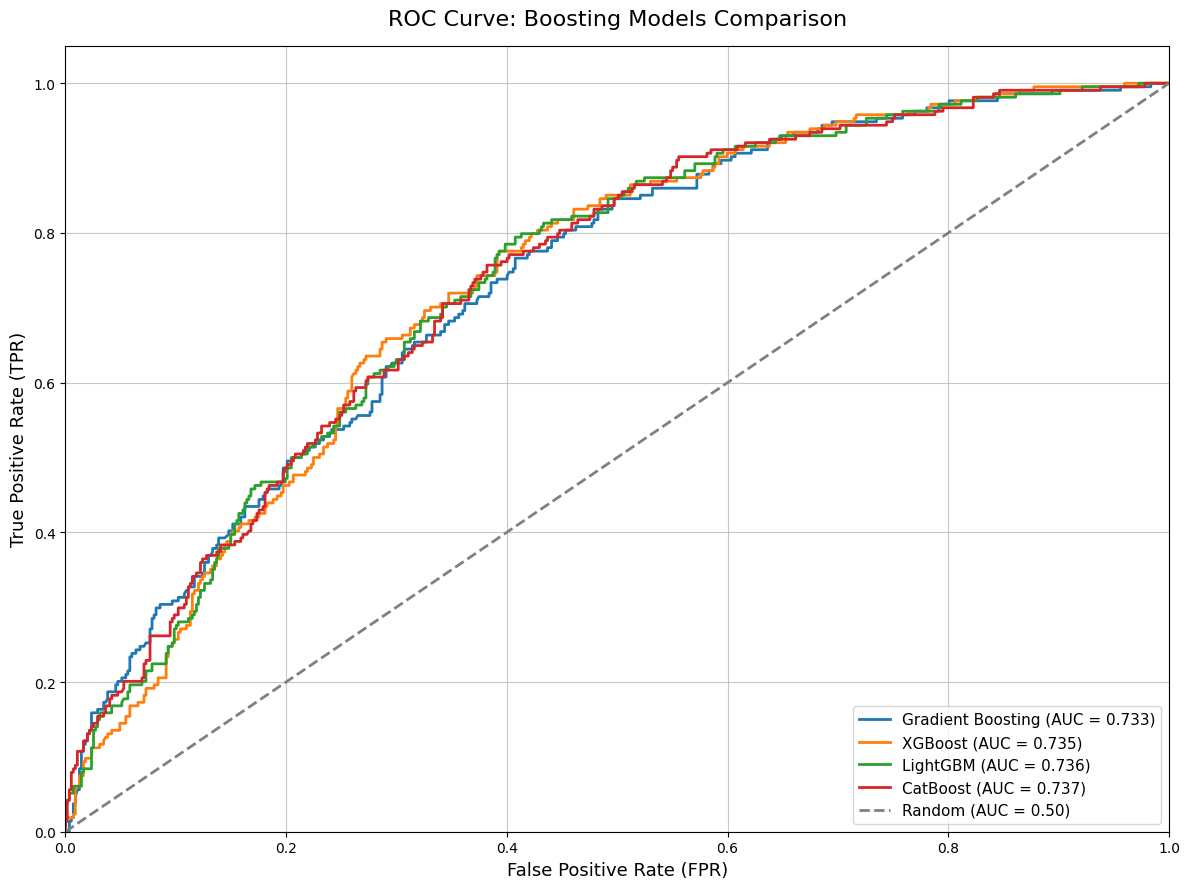

In [ ]:
# =======================================================================
# Gerar Gráfico em Inglês
# =======================================================================
plt.figure(figsize=(12, 9))
for name, data in roc_plot_data.items():
    fpr, tpr, roc_auc = data
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], color="grey", lw=2, linestyle="--", label="Random (AUC = 0.50)")
plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (FPR)", fontsize=13)
plt.ylabel("True Positive Rate (TPR)", fontsize=13)
plt.title("ROC Curve: Boosting Models Comparison", fontsize=16, pad=15)
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate

# Codifica a variável-alvo para 0/1
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Lista para armazenar os resultados
extra_results_list = []

# Loop de avaliação dos modelos boosting
for name, classifier in modelos_boosting.items():
    pipeline_extra = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', classifier)])
    pipeline_extra.fit(X_train, y_train_encoded)

    y_pred = pipeline_extra.predict(X_test)
    y_pred_texto = le.inverse_transform(y_pred)
    y_test_texto = le.inverse_transform(y_test_encoded)

    accuracy = accuracy_score(y_test_texto, y_pred_texto)
    report = classification_report(y_test_texto, y_pred_texto, output_dict=True, zero_division=0)

    extra_results_list.append({
        "Modelo": name,
        "Acurácia (%)": accuracy * 100,
        "Precision Média (ponderada, %)": report["weighted avg"]["precision"] * 100,
        "Recall Médio (ponderado, %)": report["weighted avg"]["recall"] * 100,
        "F1-Score Médio (ponderado, %)": report["weighted avg"]["f1-score"] * 100
    })

# Montar o DataFrame ordenado pelo F1-Score
extra_results_df = pd.DataFrame(extra_results_list).sort_values(by="F1-Score Médio (ponderado, %)", ascending=False)

# Exibir a tabela formatada
print("\n📊 Tabela Comparativa de Modelos Boosting")
print(tabulate(extra_results_df.round(3), headers="keys", tablefmt="fancy_grid", showindex=False))


📊 Tabela Comparativa de Modelos Boosting
╒═══════════════════╤════════════════╤══════════════════════════════════╤═══════════════════════════════╤═════════════════════════════════╕
│ Modelo            │   Acurácia (%) │   Precision Média (ponderada, %) │   Recall Médio (ponderado, %) │   F1-Score Médio (ponderado, %) │
╞═══════════════════╪════════════════╪══════════════════════════════════╪═══════════════════════════════╪═════════════════════════════════╡
│ XGBoost           │         72.405 │                           69.792 │                        72.405 │                          70.248 │
├───────────────────┼────────────────┼──────────────────────────────────┼───────────────────────────────┼─────────────────────────────────┤
│ CatBoost          │         73.587 │                           70.612 │                        73.587 │                          69.895 │
├───────────────────┼────────────────┼──────────────────────────────────┼───────────────────────────────┼─────────────

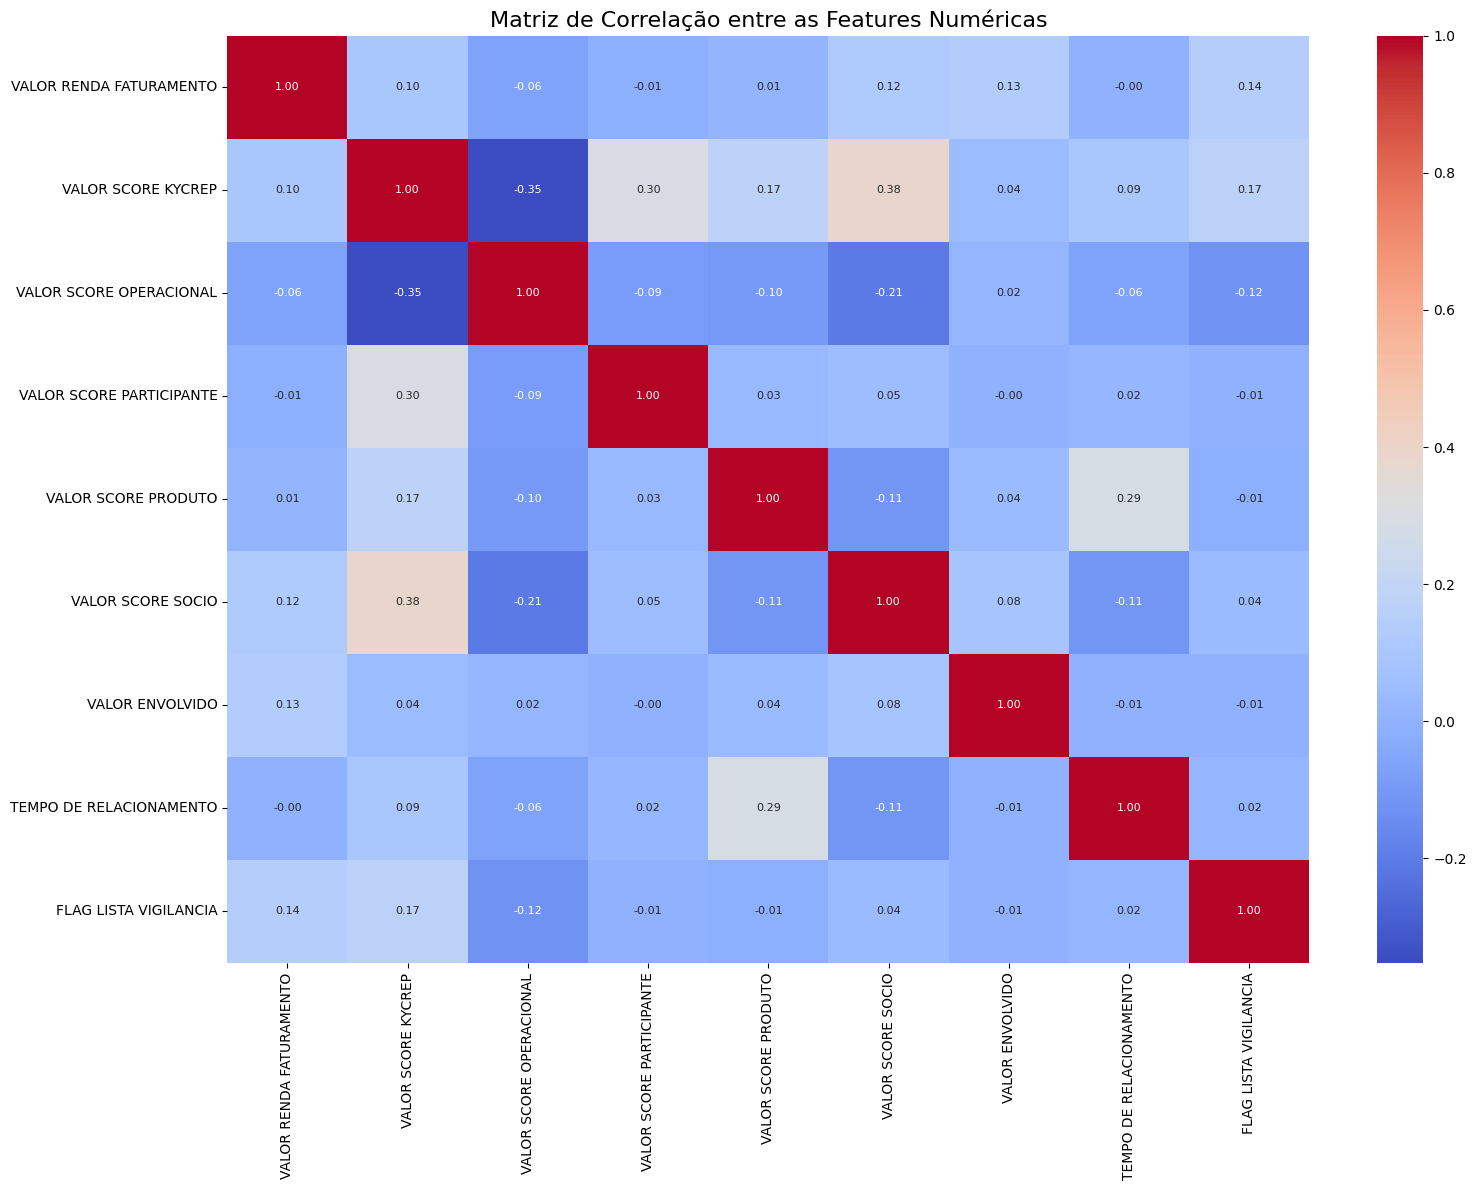

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cálculo da Matriz de Correlação
X_train_numerico = X_train[numerical_cols]
corr_matrix = X_train_numerico.corr()

# 2. Geração e Salvamento da Imagem
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    annot_kws={"size": 8}
)
plt.title('Matriz de Correlação entre as Features Numéricas', fontsize=16)

# Salva a figura em PDF vetorial para uso em artigos/Overleaf
plt.tight_layout()
plt.savefig("corr_matrix_pt.pdf", format="pdf", bbox_inches="tight")

# Mostra a imagem na tela do Colab
plt.show()

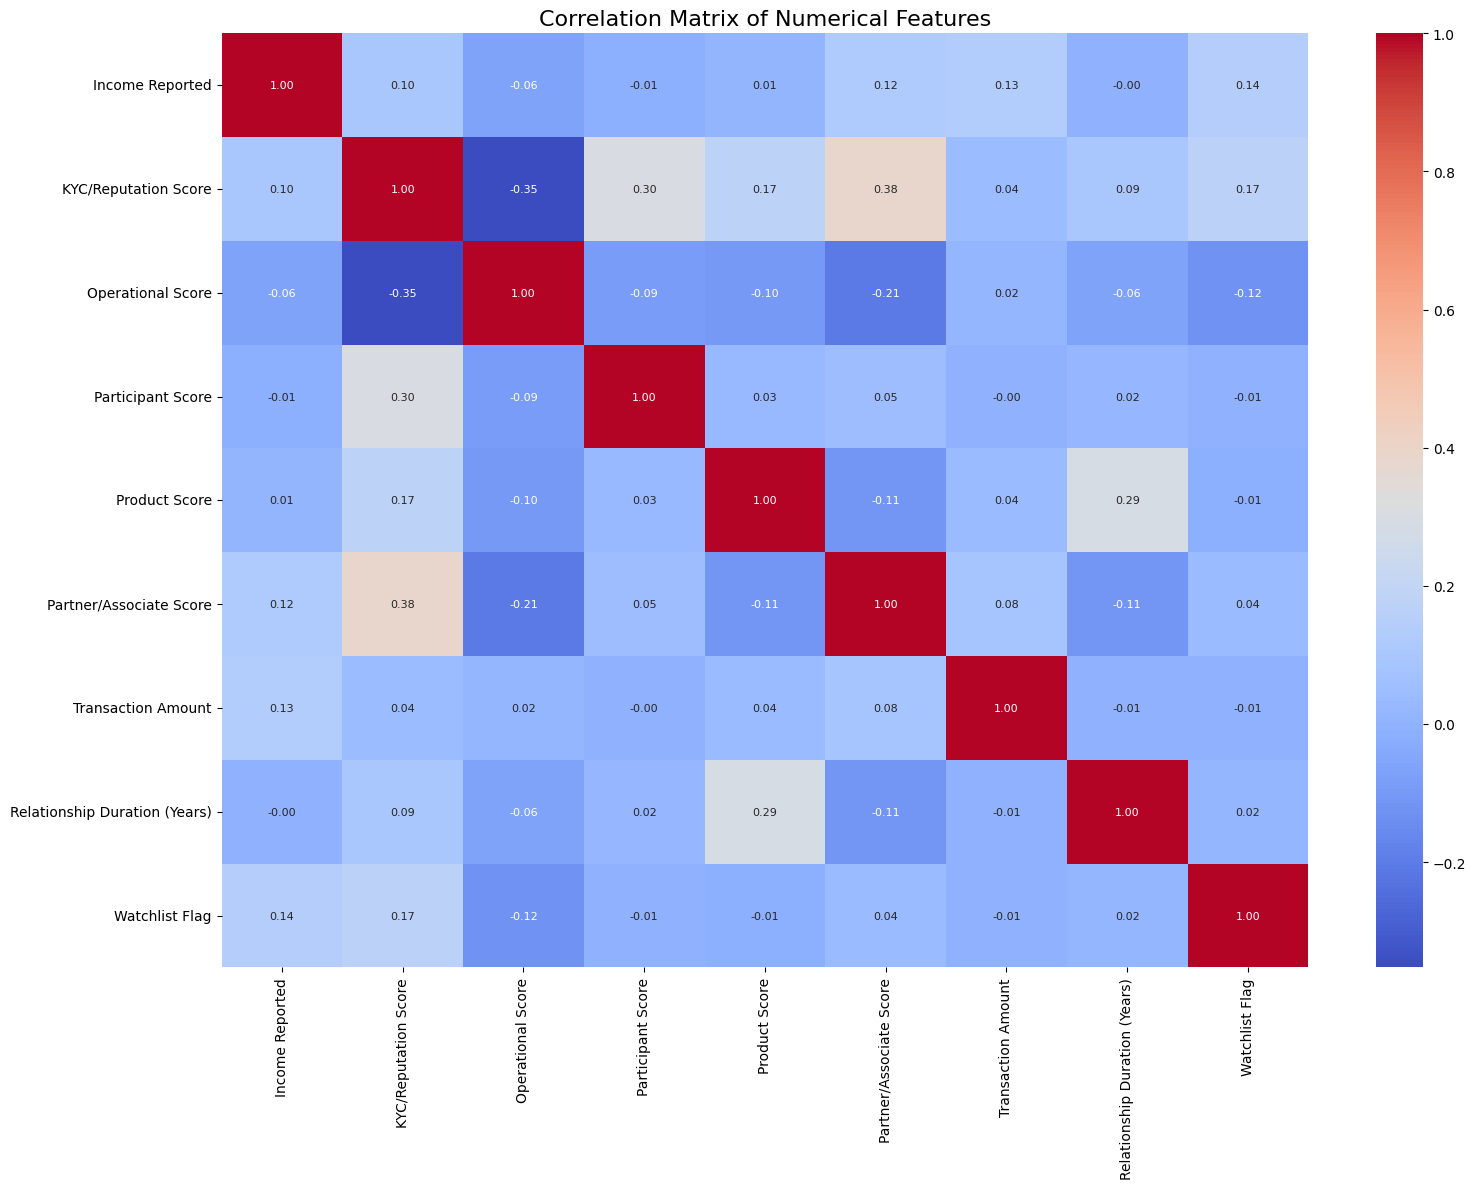

In [ ]:
# =======================================================================
# Gráfico da Matriz de Correlação (Versão em Inglês)
# =======================================================================

# Renomeia colunas e índices da matriz com nomes traduzidos
corr_matrix_en = corr_matrix.rename(columns=colunas_traduzidas, index=colunas_traduzidas)

# Criação da figura
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix_en,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    annot_kws={"size": 8}
)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.tight_layout()

# Salvar em formato EPS
plt.savefig("relationship_matrix_eng.eps", format="eps", bbox_inches="tight")

# Exibir na tela
plt.show()

# OUTRAS COMPARACOES

In [ ]:
# =======================================================================
# ETAPA FINAL: Treinamento e Avaliação do Modelo Campeão
# =======================================================================
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

# 1. Definir os melhores hiperparâmetros encontrados para o XGBoost
best_params_xgb = {
    'n_estimators': 782,
    'max_depth': 9,
    'learning_rate': 0.13668544982429182,
    'subsample': 0.8111115572120129,
    'colsample_bytree': 0.911361357267433,
    'gamma': 0.894880919037678,
    'random_state': 42
}

print("🚀 Treinando o modelo campeão (XGBoost) com os melhores hiperparâmetros...")

# 2. Criar a instância do modelo final
final_champion_model = XGBClassifier(**best_params_xgb)

# 3. Montar o pipeline final com o preprocessor original
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', final_champion_model)])

# --- CORREÇÃO ---
# Garantir que a variável-alvo esteja codificada numericamente para o treino
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# 4. Treinar o pipeline com os dados de treino e a variável-alvo CODIFICADA
final_pipeline.fit(X_train, y_train_encoded)

print("✅ Modelo campeão treinado!")
print("\n" + "="*80)
print("    📊  A V A L I A Ç Ã O   F I N A L   N O   C O N J U N T O   D E   T E S T E  📊")
print("="*80)


# 5. Executar o teste final no arquivo 'pld-test.csv'
# A sua função 'executar_teste_final' já lida com a saída e comparação corretamente.
executar_teste_final(test_path, final_pipeline)

🚀 Treinando o modelo campeão (XGBoost) com os melhores hiperparâmetros...
✅ Modelo campeão treinado!

    📊  A V A L I A Ç Ã O   F I N A L   N O   C O N J U N T O   D E   T E S T E  📊

   🎯 Acurácia Geral (pld-test.csv, Limiar 0.10): 58.99%

   📊 Relatório de Classificação:
+---------------+-------------+----------+------------+-----------+
|               |   precision |   recall |   f1-score |   support |
+===============+=============+==========+============+===========+
| COMUNICAR     |      0.394  |   0.859  |     0.5402 |       610 |
+---------------+-------------+----------+------------+-----------+
| NAO_COMUNICAR |      0.8982 |   0.485  |     0.6299 |      1565 |
+---------------+-------------+----------+------------+-----------+
| accuracy      |      0.5899 |   0.5899 |     0.5899 |         0 |
+---------------+-------------+----------+------------+-----------+
| macro avg     |      0.6461 |   0.672  |     0.585  |      2175 |
+---------------+-------------+----------+---

In [ ]:
# =======================================================================
# ANÁLISE FINAL: Comparação Definitiva dos Modelos Campeões
# =======================================================================
import pandas as pd
import numpy as np
from tabulate import tabulate
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Importando os classificadores
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

# --- 1. FUNÇÃO DE ANÁLISE DE LIMIAR (Versão Corrigida) ---
def analisar_variacao_limiar(pipeline_treinado, nome_modelo, limiares_para_testar):
    """
    Testa um pipeline treinado com diferentes limiares e retorna um DataFrame com as métricas.
    """
    print(f"\n--- Analisando o modelo: {nome_modelo} ---")

    df_teste = pd.read_csv(test_path, delimiter=';', on_bad_lines='skip')
    df_teste = criar_tempo_relacionamento(df_teste)
    df_teste = criar_flag_lista_vigilancia(df_teste)
    df_teste = remover_colunas_irrelevantes(df_teste)
    df_teste = remover_parecer_ausente(df_teste)
    df_teste = limpar_e_converter_numericos(df_teste)
    df_teste = remover_renda_negativa(df_teste)

    X_teste_final = df_teste.drop(columns=["PARECER"])
    y_teste_final_texto = df_teste["PARECER"]

    probabilidades = pipeline_treinado.predict_proba(X_teste_final)
    idx_classe_positiva = list(le.classes_).index(positive_class_label)
    prob_classe_positiva = probabilidades[:, idx_classe_positiva]

    resultados = []

    for limiar in limiares_para_testar:
        classe_alternativa = le.classes_[1 - idx_classe_positiva]
        y_pred_final = np.where(prob_classe_positiva >= limiar, positive_class_label, classe_alternativa)

        recall = recall_score(y_teste_final_texto, y_pred_final, pos_label=positive_class_label)
        precision = precision_score(y_teste_final_texto, y_pred_final, pos_label=positive_class_label, zero_division=0)
        f1 = f1_score(y_teste_final_texto, y_pred_final, pos_label=positive_class_label)

        cm = confusion_matrix(y_teste_final_texto, y_pred_final, labels=le.classes_)
        fn = cm[0, 1]
        fp = cm[1, 0]

        resultados.append({
            "Limiar": f"{limiar:.2f}",
            "Recall (Detecção)": f"{recall:.2%}",
            "Precision (Assertividade)": f"{precision:.2%}",
            "F1-Score": f"{f1:.4f}",
            "Falsos Negativos (Risco)": fn,
            "Falsos Positivos (Custo)": fp
        })

    return pd.DataFrame(resultados)

# --- 2. PREPARAÇÃO ---
if 'le' not in globals():
    le = LabelEncoder()
    y_train_encoded = le.fit_transform(y_train)

# --- PARÂMETROS DOS MODELOS CAMPEÕES ---

# Parâmetros do SEU Gradient Boosting original
params_gboost_original = {
      'learning_rate': 0.021616722433639893,
      'max_depth': 7,
      'min_samples_leaf': 4,
      'min_samples_split': 9,
      'n_estimators': 251,
      'subsample': 0.8603553891795411,
      'random_state': 42 # Adicionado para consistência
}

# Melhores parâmetros encontrados para o XGBoost via Optuna
params_xgboost_optuna = {
    'n_estimators': 782,
    'max_depth': 9,
    'learning_rate': 0.13668544982429182,
    'subsample': 0.8111115572120129,
    'colsample_bytree': 0.911361357267433,
    'gamma': 0.894880919037678,
    'random_state': 42
}

# Dicionário final de modelos para a análise
modelos_para_analise = {
    "XGBoost (Otimizado via Optuna)": XGBClassifier(**params_xgboost_optuna),
    "GBoost (Seus Parâmetros Originais)": GradientBoostingClassifier(**params_gboost_original)
}

limiares_para_testar = [0.10, 0.15, 0.20, 0.25, 0.30, 0.40, 0.50]

# --- 3. EXECUÇÃO ---
for nome, modelo in modelos_para_analise.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', modelo)])
    pipeline.fit(X_train, y_train_encoded)

    df_analise = analisar_variacao_limiar(pipeline, nome, limiares_para_testar)
    print(tabulate(df_analise, headers='keys', tablefmt='fancy_grid', showindex=False))
    print("\n" + "="*80)


--- Analisando o modelo: XGBoost (Otimizado via Optuna) ---
╒══════════╤═════════════════════╤═════════════════════════════╤════════════╤════════════════════════════╤════════════════════════════╕
│   Limiar │ Recall (Detecção)   │ Precision (Assertividade)   │   F1-Score │   Falsos Negativos (Risco) │   Falsos Positivos (Custo) │
╞══════════╪═════════════════════╪═════════════════════════════╪════════════╪════════════════════════════╪════════════════════════════╡
│     0.1  │ 85.90%              │ 39.40%                      │     0.5402 │                         86 │                        806 │
├──────────┼─────────────────────┼─────────────────────────────┼────────────┼────────────────────────────┼────────────────────────────┤
│     0.15 │ 79.34%              │ 42.57%                      │     0.5541 │                        126 │                        653 │
├──────────┼─────────────────────┼─────────────────────────────┼────────────┼────────────────────────────┼─────────────────

# HIPERPARAMETROS

In [ ]:
!pip install optuna -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 12.3 MB/s eta 0:00:00


In [ ]:
# =============================================================================
# GRADIENT BOOSTING + CV (estratificada) + OPTUNA (rápido) focando RECALL
# Blindado contra NaN / folds sem positivos / probs esquisitas
# =============================================================================
import numpy as np
import pandas as pd
import warnings
import optuna
from tabulate import tabulate

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score, classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

# -----------------------
# Parâmetros gerais (ajuste se quiser)
# -----------------------
N_TRIALS = 20          # 20~40 é um bom range rápido
N_SPLITS = 3           # 3 folds p/ acelerar (pode usar 5 se couber)
RANDOM_STATE = 42
TIMEOUT_SECS = 600     # teto de tempo p/ a busca (10 min)
warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.WARNING)

# -----------------------
# Checagens mínimas
# -----------------------
assert 'X_train' in globals() and 'X_test' in globals(), "X_train/X_test não encontrados."
assert 'y_train' in globals() and 'y_test' in globals(), "y_train/y_test não encontrados."
assert 'preprocessor' in globals(), "preprocessor (ColumnTransformer) não encontrado."
if 'limiar_max_recall' not in globals():
    limiar_max_recall = 0.10
if 'positive_class_label' not in globals():
    positive_class_label = 'COMUNICAR'

# -----------------------
# LabelEncoder estável + índice da classe positiva
# -----------------------
le = LabelEncoder()
# garante que o encoder conheça todas as classes possíveis
le.fit(list(set(pd.Series(y_train).unique()) | set(pd.Series(y_test).unique())))
y_train_enc = le.transform(y_train)
y_test_enc  = le.transform(y_test)
pos_label_idx = le.transform([positive_class_label])[0]

# -----------------------
# Espaço de busca ENXUTO do GBoost (rápido e efetivo)
# -----------------------
def build_gboost(trial):
    params = {
        'n_estimators':      trial.suggest_int('n_estimators', 150, 500),
        'max_depth':         trial.suggest_int('max_depth', 2, 8),
        'learning_rate':     trial.suggest_float('learning_rate', 0.02, 0.15, log=True),
        'subsample':         trial.suggest_float('subsample', 0.7, 1.0),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf':  trial.suggest_int('min_samples_leaf', 1, 20),
        'random_state':      RANDOM_STATE
    }
    return GradientBoostingClassifier(**params)

# -----------------------
# CV manual à prova de NaN (aplica o MESMO limiar em cada fold)
# -----------------------
def cv_recall_with_threshold_safe(pipe, X, y, threshold, n_splits=3, random_state=42):
    """
    Retorna o RECALL médio (classe positiva) usando predict_proba + threshold,
    com proteções contra NaN/inf e folds sem positivos verdadeiros.
    """
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    scores = []
    # Suporta X como pandas DataFrame ou numpy array
    is_pandas = hasattr(X, "iloc")
    for tr_idx, va_idx in skf.split(X, y):
        X_tr = X.iloc[tr_idx] if is_pandas else X[tr_idx]
        X_va = X.iloc[va_idx] if is_pandas else X[va_idx]
        y_tr, y_va = y[tr_idx], y[va_idx]

        pipe.fit(X_tr, y_tr)

        proba_va = pipe.predict_proba(X_va)[:, pos_label_idx]
        # saneia probabilidades
        proba_va = np.nan_to_num(proba_va, nan=0.0, posinf=1.0, neginf=0.0)

        y_pred = (proba_va >= threshold).astype(int)

        # se não houver positivos reais no fold, defina recall=0
        if np.sum(y_va == pos_label_idx) == 0:
            fold_recall = 0.0
        else:
            fold_recall = recall_score(y_va, y_pred,
                                       pos_label=pos_label_idx,
                                       average='binary',
                                       zero_division=0)
        if not np.isfinite(fold_recall):
            fold_recall = 0.0
        scores.append(float(fold_recall))
    return float(np.mean(scores)) if len(scores) else 0.0

# -----------------------
# Objective do Optuna (maximiza RECALL médio com limiar)
# -----------------------
def objective(trial):
    clf  = build_gboost(trial)
    pipe = Pipeline([('preprocessor', preprocessor), ('classifier', clf)])
    score = cv_recall_with_threshold_safe(
        pipe, X_train, y_train_enc,
        threshold=limiar_max_recall,
        n_splits=N_SPLITS,
        random_state=RANDOM_STATE
    )
    # fallback se algo retornar não-finito
    if not np.isfinite(score):
        score = 0.0
    return score

print("🚀 Iniciando otimização (Gradient Boosting + CV estratificada) focada em RECALL...")
pruner = optuna.pruners.MedianPruner(n_startup_trials=5, n_warmup_steps=0)
study = optuna.create_study(direction='maximize',
                            sampler=optuna.samplers.TPESampler(seed=RANDOM_STATE),
                            pruner=pruner)

study.optimize(objective, n_trials=N_TRIALS, timeout=TIMEOUT_SECS)

# -----------------------
# Recupera melhor conjunto (ou aplica fallback amistoso)
# -----------------------
if len(study.trials) == 0 or all(t.state.name != "COMPLETE" for t in study.trials):
    # fallback conservador caso nada complete
    best_params = {
        'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.08,
        'subsample': 0.9, 'min_samples_split': 6, 'min_samples_leaf': 4
    }
    best_score = 0.0
    print("⚠️ Nenhum trial completo. Usando parâmetros de fallback:", best_params)
else:
    best_params = study.best_params
    best_score  = study.best_value

print(f"✅ Melhor RECALL médio (CV, limiar={limiar_max_recall:.2f}): {best_score:.4f}")
print("📋 Hiperparâmetros ótimos:", best_params)

# -----------------------
# Refit no TREINO completo e avaliação no TESTE (hold-out)
# -----------------------
best_clf  = GradientBoostingClassifier(**best_params, random_state=RANDOM_STATE)
pipe_best = Pipeline([('preprocessor', preprocessor), ('classifier', best_clf)])
pipe_best.fit(X_train, y_train_enc)

proba_test  = pipe_best.predict_proba(X_test)[:, pos_label_idx]
proba_test  = np.nan_to_num(proba_test, nan=0.0, posinf=1.0, neginf=0.0)
y_pred_test = (proba_test >= limiar_max_recall).astype(int)

# Relatório e matriz de confusão (classe positiva = COMUNICAR)
print("\n================  AVALIAÇÃO NO CONJUNTO DE TESTE (HOLD-OUT)  ================")
print(f"Limiar aplicado: {limiar_max_recall:.2f}")

# ordem dos rótulos para exibição
class_order = [0, 1]
target_names = le.inverse_transform(class_order)
print(classification_report(y_test_enc, y_pred_test, labels=class_order, target_names=target_names, digits=4))

cm = confusion_matrix(y_test_enc, y_pred_test, labels=[pos_label_idx, 1 - pos_label_idx])
# labels=[pos, neg] -> linha0 (real pos): [TP, FN]; linha1 (real neg): [FP, TN]
TP, FN = int(cm[0, 0]), int(cm[0, 1])
FP, TN = int(cm[1, 0]), int(cm[1, 1])

tbl = pd.DataFrame({"Métrica": ["TP", "FN", "FP", "TN"], "Valor": [TP, FN, FP, TN]})
print(tabulate(tbl, headers="keys", tablefmt="fancy_grid", showindex=False))

# -----------------------
# Variáveis úteis p/ usar depois no notebook
# -----------------------
best_recall_cv = best_score
best_model_params = best_params
print("\n✅ pipe_best disponível para uso (SHAP, explicações, etc.).")

🚀 Iniciando otimização (Gradient Boosting + CV estratificada) focada em RECALL...
✅ Melhor RECALL médio (CV, limiar=0.15): 0.3804
📋 Hiperparâmetros ótimos: {'n_estimators': 491, 'max_depth': 6, 'learning_rate': 0.1487349069964866, 'subsample': 0.7989053517547225, 'min_samples_split': 14, 'min_samples_leaf': 1}

================  AVALIAÇÃO NO CONJUNTO DE TESTE (HOLD-OUT)  ================
Limiar aplicado: 0.15
               precision    recall  f1-score   support

    COMUNICAR     0.1692    0.3405    0.2261       326
NAO_COMUNICAR     0.5734    0.3465    0.4320       834

     accuracy                         0.3448      1160
    macro avg     0.3713    0.3435    0.3290      1160
 weighted avg     0.4598    0.3448    0.3741      1160

╒═══════════╤═════════╕
│ Métrica   │   Valor │
╞═══════════╪═════════╡
│ TP        │     111 │
├───────────┼─────────┤
│ FN        │     215 │
├───────────┼─────────┤
│ FP        │     545 │
├───────────┼─────────┤
│ TN        │     289 │
╘═══════════╧═

In [ ]:
# ===================== FINAL: TABELA LIMIARES (BASE vs REG) =====================
import numpy as np
import pandas as pd
from copy import deepcopy
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

# --- Descoberta de rótulos e positivo/negativo ---
classes_uniq = np.unique(y_test).tolist()
assert len(classes_uniq) == 2, "Este bloco assume binário."
POS_LABEL = "COMUNICAR" if "COMUNICAR" in classes_uniq else classes_uniq[0]
NEG_LABEL = [c for c in classes_uniq if c != POS_LABEL][0]

def evaluate_with_threshold(pipe, X, y_true, thresh, pos_label=POS_LABEL, neg_label=NEG_LABEL):
    clf = pipe.named_steps["classifier"]
    pos_idx = int(np.where(clf.classes_ == pos_label)[0][0])
    proba = pipe.predict_proba(X)[:, pos_idx]
    y_pred = np.where(proba >= thresh, pos_label, neg_label)
    acc  = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, pos_label=pos_label, zero_division=0)
    rec  = recall_score(y_true, y_pred, pos_label=pos_label, zero_division=0)
    cm   = confusion_matrix(y_true, y_pred, labels=[POS_LABEL, NEG_LABEL])
    TP, FN = cm[0,0], cm[0,1]
    FP, TN = cm[1,0], cm[1,1]
    return {"accuracy": acc, "precision_pos": prec, "recall_pos": rec,
            "TP": TP, "FP": FP, "TN": TN, "FN": FN}, y_pred, proba, cm

def make_pipeline_from(final_pipeline, gboost_params=None):
    pre = final_pipeline.named_steps["preprocessor"]
    gb0 = final_pipeline.named_steps["classifier"]
    assert isinstance(gb0, GradientBoostingClassifier), "Seu final_pipeline não usa GradientBoostingClassifier."
    if gboost_params is None:
        gb = deepcopy(gb0)
    else:
        gb = deepcopy(gb0)
        gb.set_params(**gboost_params)
    return Pipeline([("preprocessor", pre), ("classifier", gb)])

# --- Pipelines: BASE (fiel) e REG (regularizado) ---
pipe_base = make_pipeline_from(final_pipeline)
pipe_base.fit(X_train, y_train)

pipe_reg = make_pipeline_from(
    final_pipeline,
    gboost_params=dict(
        max_depth=2,
        min_samples_leaf=50,
        min_samples_split=200,
        subsample=0.8,
    )
)
pipe_reg.fit(X_train, y_train)

# --- Varredura de limiares ---
thresholds = [0.10, 0.15, 0.20, 0.25, 0.30]
rows = []
cms = {}  # guardar matrizes para consulta

for model_name, pipe in [("BASE", pipe_base), ("REG", pipe_reg)]:
    for th in thresholds:
        res, ypred, proba, cm = evaluate_with_threshold(pipe, X_test, y_test, th)
        rows.append({
            "model": model_name,
            "threshold": th,
            **res
        })
        cms[(model_name, th)] = cm

df_metrics = pd.DataFrame(rows)
df_show = df_metrics.copy()
for c in ["accuracy","precision_pos","recall_pos"]:
    df_show[c] = df_show[c].map(lambda v: round(float(v), 4))

# Ordena por modelo e limiar
df_show = df_show.sort_values(["model","threshold"]).reset_index(drop=True)

print("===== RESULTADOS: MÉTRICAS por LIMIAR =====")
print(df_show[["model","threshold","accuracy","precision_pos","recall_pos","TP","FP","TN","FN"]].to_string(index=False))

# --- Melhores escolhas por restrição de recall ---
def best_by_accuracy(df, min_recall):
    cand = df[df["recall_pos"] >= min_recall]
    if cand.empty:
        return None
    idx = cand["accuracy"].idxmax()
    return cand.loc[idx]

best95 = best_by_accuracy(df_metrics, 0.95)
best90 = best_by_accuracy(df_metrics, 0.90)
best_any = df_metrics.loc[df_metrics["accuracy"].idxmax()]

print("\n===== MELHOR POR ACURÁCIA com restrição de recall =====")
if best95 is not None:
    print(f"Recall ≥ 0.95 -> {best95['model']} @ {best95['threshold']:.2f} | acc={best95['accuracy']:.4f}, prec={best95['precision_pos']:.4f}, rec={best95['recall_pos']:.4f}")
else:
    print("Recall ≥ 0.95 -> (nenhum candidato)")

if best90 is not None:
    print(f"Recall ≥ 0.90 -> {best90['model']} @ {best90['threshold']:.2f} | acc={best90['accuracy']:.4f}, prec={best90['precision_pos']:.4f}, rec={best90['recall_pos']:.4f}")
else:
    print("Recall ≥ 0.90 -> (nenhum candidato)")

print(f"Sem restrição -> {best_any['model']} @ {best_any['threshold']:.2f} | acc={best_any['accuracy']:.4f}, prec={best_any['precision_pos']:.4f}, rec={best_any['recall_pos']:.4f}")

# --- Matriz de confusão do melhor absoluto ---
best_key = (best_any["model"], float(best_any["threshold"]))
cm_best = cms[best_key]
print("\n===== MATRIZ DE CONFUSÃO do Melhor Absoluto [linhas=verdadeiro, colunas=previsto] =====")
print(best_key, "\n", cm_best)

===== RESULTADOS: MÉTRICAS por LIMIAR =====
model  threshold  accuracy  precision_pos  recall_pos  TP  FP  TN  FN
 BASE       0.10    0.4940         0.3525      0.9571 312 573 261  14
 BASE       0.15    0.5828         0.3932      0.8926 291 449 385  35
 BASE       0.20    0.6328         0.4211      0.8190 267 367 467  59
 BASE       0.25    0.6681         0.4467      0.7577 247 306 528  79
 BASE       0.30    0.6905         0.4639      0.6503 212 245 589 114
  REG       0.10    0.3474         0.3006      0.9969 325 756  78   1
  REG       0.15    0.4603         0.3384      0.9632 314 614 220  12
  REG       0.20    0.5483         0.3750      0.9110 297 495 339  29
  REG       0.25    0.6379         0.4235      0.7975 260 354 480  66
  REG       0.30    0.6888         0.4653      0.7209 235 270 564  91

===== MELHOR POR ACURÁCIA com restrição de recall =====
Recall ≥ 0.95 -> BASE @ 0.10 | acc=0.4940, prec=0.3525, rec=0.9571
Recall ≥ 0.90 -> REG @ 0.20 | acc=0.5483, prec=0.3750, rec=0.9

#PADRÕES (REGRAS SHAP)

In [ ]:
# ===================== PADRÕES (REGRAS SHAP) — FÁCIL DE LER =====================
import numpy as np
import pandas as pd
from collections import defaultdict, Counter

# ---- 0) parâmetros do seu contexto ----
# classe positiva (detecta automaticamente; usa "COMUNICAR" se existir)
classes_uniq = pd.Series(y_test).astype(str).unique().tolist()
POS_LABEL = "COMUNICAR" if "COMUNICAR" in classes_uniq else classes_uniq[0]
NEG_LABEL = [c for c in classes_uniq if c != POS_LABEL][0]
THRESH = 0.10   # mesmo limiar do seu trabalho; ajuste se estiver usando outro

# ---- 1) utilitários ----
def predict_proba_pos(pipe, X, pos_label=POS_LABEL):
    clf = pipe.named_steps["classifier"]
    # pega o índice da classe positiva na ordem real do estimador
    pos_idx = int(np.where(clf.classes_ == pos_label)[0][0])
    return pipe.predict_proba(X)[:, pos_idx]

def make_orig_feature_map(pre):
    """
    Mapeia features pós-transformação -> feature ORIGINAL
    supõe nomenclatura scikit padrão: 'num__COL', 'cat__COL_val...'
    """
    names = list(pre.get_feature_names_out())
    mapping = []
    for j, fname in enumerate(names):
        if fname.startswith("num__"):
            orig = fname.replace("num__", "", 1)
        elif fname.startswith("cat__"):
            tail = fname.replace("cat__", "", 1)
            orig = tail.split("_", 1)[0]  # coluna original antes do primeiro '_'
        else:
            orig = fname
        mapping.append((j, fname, orig))
    return names, mapping

def compute_shap_aggregated(final_pipeline, X):
    """
    Calcula SHAP no espaço transformado e agrega |SHAP| por feature ORIGINAL.
    Retorna:
      - abs_shap_orig: ndarray (n_amostras, n_features_orig)
      - orig_features: lista de nomes originais
    """
    import shap
    pre = final_pipeline.named_steps["preprocessor"]
    clf = final_pipeline.named_steps["classifier"]
    X_trans = pre.transform(X)
    # tenta TreeExplainer; se falhar, cai no Explainer genérico
    try:
        explainer = shap.TreeExplainer(clf)
        shap_vals = explainer.shap_values(X_trans)
        if isinstance(shap_vals, list):
            shap_vals = max(shap_vals, key=lambda a: a.shape[1])
    except Exception:
        explainer = shap.Explainer(clf)
        shap_vals = explainer(X_trans).values

    abs_shap = np.abs(shap_vals)
    _, mapping = make_orig_feature_map(pre)

    group_idx = defaultdict(list)
    for j, _, orig in mapping:
        group_idx[orig].append(j)

    orig_features = sorted(group_idx.keys())
    abs_shap_orig = np.zeros((abs_shap.shape[0], len(orig_features)))
    for i, of in enumerate(orig_features):
        cols = group_idx[of]
        abs_shap_orig[:, i] = abs_shap[:, cols].sum(axis=1)

    return abs_shap_orig, orig_features

def row_topk_pct(row_abs, k=3):
    """retorna [(feat, pct)] top-k por |SHAP| normalizado na linha."""
    s = row_abs.sum()
    pct = row_abs / (s if s > 0 else 1.0)
    idx = np.argpartition(pct, -k)[-k:]
    idx = idx[np.argsort(-pct[idx])]
    return idx, pct[idx]

# ---- 2) SHAP global + predições do modelo no teste ----
pre = final_pipeline.named_steps["preprocessor"]
proba_pos = predict_proba_pos(final_pipeline, X_test, POS_LABEL)
y_pred = np.where(proba_pos >= THRESH, POS_LABEL, NEG_LABEL)

abs_shap_orig, orig_features = compute_shap_aggregated(final_pipeline, X_test)
df_abs = pd.DataFrame(abs_shap_orig, index=X_test.index, columns=orig_features)

# ---- 3) SUMÁRIO GLOBAL: média de |SHAP| e ranking ----
global_mean = df_abs.mean(axis=0).sort_values(ascending=False)
df_global = pd.DataFrame({
    "feature": global_mean.index,
    "mean_abs_shap": global_mean.values
})
df_global["rank"] = np.arange(1, len(df_global)+1)
print("\n=== SHAP GLOBAL — TOP 15 (|SHAP| médio agregado por feature original) ===")
print(df_global.head(15).assign(mean_abs_shap=lambda d: d["mean_abs_shap"].round(6)).to_string(index=False))

# ---- 4) PADRÃO POSITIVO: frequência das top-3 entre instâncias previstas POSITIVAS ----
pos_mask = (pd.Series(y_pred, index=X_test.index) == POS_LABEL)
df_pos_abs = df_abs.loc[pos_mask]
idxs = df_pos_abs.index.to_numpy()

counts = Counter()
contribs = defaultdict(list)

for ridx in idxs:
    row = df_abs.loc[ridx].values
    top_idx, top_pct = row_topk_pct(row, k=3)
    for j, p in zip(top_idx, top_pct):
        feat = orig_features[j]
        counts[feat] += 1
        contribs[feat].append(float(p))

# tabela de frequência e contribuição média (em % dentro dos top-3)
rows = []
for feat, freq in counts.most_common():
    rows.append({
        "feature": feat,
        "freq_in_top3_pos": freq,
        "mean_pct_within_top3": np.mean(contribs[feat])
    })
df_pos_top = pd.DataFrame(rows)
if not df_pos_top.empty:
    df_pos_top["mean_pct_within_top3"] = (100 * df_pos_top["mean_pct_within_top3"]).round(2)
print("\n=== POSITIVOS: Variáveis MAIS FREQUENTES no Top-3 (com % médio dentro do Top-3) ===")
print(df_pos_top.head(20).to_string(index=False))

# ---- 5) “REGRAS SHAP” 1×1 (simples): quantis p/ numéricas e categorias + métricas ----
# identifica tipo de cada feature original no espaço ORIGINAL (X_test)
orig_cols_available = set(X_test.columns.tolist())
num_cols = [c for c in orig_features if c in orig_cols_available and pd.api.types.is_numeric_dtype(X_test[c])]
cat_cols = [c for c in orig_features if c in orig_cols_available and not pd.api.types.is_numeric_dtype(X_test[c])]

def build_numeric_rules(col, qbins=(0.2, 0.4, 0.6, 0.8)):
    # cria bins por quantil e mede desempenho por bin
    s = X_test[col]
    # trata casos degenerados (constante)
    if s.nunique(dropna=True) < 5:
        return pd.DataFrame([])
    qs = s.quantile(qbins).values
    edges = np.unique(np.concatenate(([-np.inf], qs, [np.inf])))
    labels = [f"[{edges[i]:.2f},{edges[i+1]:.2f})" for i in range(len(edges)-1)]
    cats = pd.cut(s, bins=edges, labels=labels, include_lowest=True)
    df_loc = pd.DataFrame({
        "bin": cats.astype(str),
        "y_pred": y_pred,
        "y_true": y_test.astype(str),
        "abs_shap": df_abs[col].values  # impacto agregado desta feature
    })
    agg = df_loc.groupby("bin").agg(
        n=("y_true","size"),
        pos_rate=("y_true", lambda y: np.mean(y==POS_LABEL)),
        precision=("y_pred", lambda yp: np.mean( (yp==POS_LABEL) & (df_loc.loc[yp.index,"y_true"]==POS_LABEL) )),
        mean_abs_shap=("abs_shap","mean")
    ).reset_index()
    base_pos_rate = (pd.Series(y_test).astype(str)==POS_LABEL).mean()
    agg["lift_pos_rate"] = (agg["pos_rate"] / base_pos_rate).replace([np.inf, -np.inf], np.nan)
    agg["feature"] = col
    agg["type"] = "numeric"
    return agg.sort_values(["lift_pos_rate","n","mean_abs_shap"], ascending=[False, False, False])

def build_categorical_rules(col, top_k=8, min_count=20):
    s = X_test[col].astype(str)
    vc = s.value_counts()
    keep = vc[vc >= min_count].head(top_k).index.tolist()
    mask = s.isin(keep)
    df_loc = pd.DataFrame({
        "cat": np.where(mask, s, "__OUTROS__"),
        "y_pred": y_pred,
        "y_true": y_test.astype(str),
        "abs_shap": df_abs[col].values
    })
    agg = df_loc.groupby("cat").agg(
        n=("y_true","size"),
        pos_rate=("y_true", lambda y: np.mean(y==POS_LABEL)),
        precision=("y_pred", lambda yp: np.mean( (yp==POS_LABEL) & (df_loc.loc[yp.index,"y_true"]==POS_LABEL) )),
        mean_abs_shap=("abs_shap","mean")
    ).reset_index().rename(columns={"cat":"bin"})
    base_pos_rate = (pd.Series(y_test).astype(str)==POS_LABEL).mean()
    agg["lift_pos_rate"] = (agg["pos_rate"] / base_pos_rate).replace([np.inf, -np.inf], np.nan)
    agg["feature"] = col
    agg["type"] = "categorical"
    return agg.sort_values(["lift_pos_rate","n","mean_abs_shap"], ascending=[False, False, False])

# escolhe um conjunto curto de features candidatas (as 10 mais importantes globalmente)
top_feats = df_global.head(10)["feature"].tolist()
rules_list = []

for col in top_feats:
    if col in num_cols:
        df_rules = build_numeric_rules(col)
    elif col in cat_cols:
        df_rules = build_categorical_rules(col)
    else:
        df_rules = pd.DataFrame([])
    if not df_rules.empty:
        # métricas arredondadas p/ leitura
        for c in ["pos_rate","precision","lift_pos_rate","mean_abs_shap"]:
            if c in df_rules.columns:
                df_rules[c] = df_rules[c].astype(float).round(4)
        rules_list.append(df_rules)

df_rules_all = pd.concat(rules_list, ignore_index=True) if rules_list else pd.DataFrame([])

if not df_rules_all.empty:
    # ranking final das regras (prioriza lift e cobertura)
    df_rules_all["score_rule"] = (df_rules_all["lift_pos_rate"].fillna(0) * (np.log1p(df_rules_all["n"])))
    df_rules_ranked = df_rules_all.sort_values(["score_rule","mean_abs_shap"], ascending=[False, False])

    print("\n=== REGRAS SHAP (1×1) — TOP 15 por (lift × cobertura) ===")
    cols_show = ["feature","type","bin","n","pos_rate","precision","lift_pos_rate","mean_abs_shap"]
    print(df_rules_ranked[cols_show].head(15).to_string(index=False))

    # salva CSVs
    df_global.to_csv("/content/shap_global_importance.csv", index=False)
    df_pos_top.to_csv("/content/shap_top3_positive_freq.csv", index=False)
    df_rules_ranked.to_csv("/content/shap_rules_ranked.csv", index=False)
    print("\nArquivos salvos: "
          "/content/shap_global_importance.csv, "
          "/content/shap_top3_positive_freq.csv, "
          "/content/shap_rules_ranked.csv")
else:
    print("\n[INFO] Não foi possível gerar regras (features top não estavam presentes no X_test ou eram constantes).")


=== SHAP GLOBAL — TOP 15 (|SHAP| médio agregado por feature original) ===
                 feature  mean_abs_shap  rank
      PRODUTOS ALERTADOS       0.541011     1
 VALOR RENDA FATURAMENTO       0.285915     2
   PROPORCAO_VALOR_RENDA       0.199493     3
     GAP_LOG_VALOR_RENDA       0.184283     4
      VALOR SCORE KYCREP       0.150027     5
     VALOR SCORE PRODUTO       0.110185     6
                      UF       0.108458     7
 TEMPO DE RELACIONAMENTO       0.095357     8
 VALOR SCORE OPERACIONAL       0.092769     9
         VALOR ENVOLVIDO       0.092521    10
       VALOR SCORE SOCIO       0.070590    11
VALOR SCORE PARTICIPANTE       0.041729    12
       FLAG PARTICIPANTE       0.026273    13
             FLAG DOSSIÊ       0.005207    14
   FLAG LISTA VIGILANCIA       0.004037    15

=== POSITIVOS: Variáveis MAIS FREQUENTES no Top-3 (com % médio dentro do Top-3) ===
                     feature  freq_in_top3_pos  mean_pct_within_top3
          PRODUTOS ALERTADOS       